In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
from scipy import stats 
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import StratifiedKFold

# PROJECT OBJECTIVE: 
We will build a classifier to predict the Pass/Fail yield of a particular process entity and analyse whether all the
features are required to build the model or not.
Steps and tasks: [ Total Score: 60 points]
1. Import and explore the data.

In [2]:
df=pd.read_csv("signal-data.csv")
test= pd.read_excel('Future_predictions.xlsx')

In [3]:
df.shape

(1567, 592)

In [4]:
test.shape

(18, 591)

In [5]:
df.columns

Index(['Time', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '581', '582', '583', '584', '585', '586', '587', '588', '589',
       'Pass/Fail'],
      dtype='object', length=592)

In [6]:
test.columns

Index(['Time',      0,      1,      2,      3,      4,      5,      6,      7,
            8,
       ...
          580,    581,    582,    583,    584,    585,    586,    587,    588,
          589],
      dtype='object', length=591)

In [7]:
df.head()

Time        0        1          2          3       4      5  \
0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
2  2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   
3  2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0   
4  2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0   

          6       7       8  ...       581     582     583     584      585  \
0   97.6133  0.1242  1.5005  ...       NaN  0.5005  0.0118  0.0035   2.3630   
1  102.3433  0.1247  1.4966  ...  208.2045  0.5019  0.0223  0.0055   4.4447   
2   95.4878  0.1241  1.4436  ...   82.8602  0.4958  0.0157  0.0039   3.1745   
3  104.2367  0.1217  1.4882  ...   73.8432  0.4990  0.0103  0.0025   2.0544   
4  100.3967  0.1235  1.5031  ...       NaN  0.4800  0.4766  0.1045  99.3032   

      586     587     588       589  Pass/Fail  
0     NaN     NaN     NaN       NaN         -1  
1  0.0096  0.0201  0.0060  208.2045         -1  
2  0.0584  0.0484  0.0148   82.8602          1  
3  0.0202  0.0149  0.0044   73.8432         -1  
4  0.0202  0.0149  0.0044   73.8432         -1  

[5 rows x 592 columns]

In [8]:
test.head()

Time        0        1          2          3       4    5  \
0 2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100   
1 2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100   
2 2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100   
3 2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  100   
4 2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334  100   

          6       7       8  ...     580       581     582     583     584  \
0   97.6133  0.1242  1.5005  ...     NaN       NaN  0.5005  0.0118  0.0035   
1  102.3433  0.1247  1.4966  ...  0.0060  208.2045  0.5019  0.0223  0.0055   
2   95.4878  0.1241  1.4436  ...  0.0148   82.8602  0.4958  0.0157  0.0039   
3  104.2367  0.1217  1.4882  ...  0.0044   73.8432  0.4990  0.0103  0.0025   
4  100.3967  0.1235  1.5031  ...     NaN       NaN  0.4800  0.4766  0.1045   

       585     586     587     588       589  
0   2.3630     NaN     NaN     NaN       NaN  
1   4.4447  0.0096  0.0201  0.0060  208.2045  
2   3.1745  0.0584  0.0484  0.0148   82.8602  
3   2.0544  0.0202  0.0149  0.0044   73.8432  
4  99.3032  0.0202  0.0149  0.0044   73.8432  

[5 rows x 591 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Columns: 591 entries, Time to 589
dtypes: datetime64[ns](1), float64(458), int64(132)
memory usage: 83.2 KB


2.Data cleansing:
• Missing value treatment.
• Drop attribute/s if required using relevant functional knowledge.
• Make all relevant modifications on the data using both functional/logical reasoning/assumptions

In [11]:
df.isnull().sum()

Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64

In [12]:
df=df.fillna(0) #fill nan values with 0

In [13]:
df.isnull().sum()

Time         0
0            0
1            0
2            0
3            0
            ..
586          0
587          0
588          0
589          0
Pass/Fail    0
Length: 592, dtype: int64

In [14]:
test.isnull().sum()

Time    0
0       0
1       0
2       0
3       0
       ..
585     0
586     1
587     1
588     1
589     1
Length: 591, dtype: int64

In [15]:
test=test.fillna(0) #fill nan values with 0

In [16]:
test.isnull().sum()

Time    0
0       0
1       0
2       0
3       0
       ..
585     0
586     0
587     0
588     0
589     0
Length: 591, dtype: int64

# Extracting date time data into new columns for test and data

In [17]:
df['year'] = pd.DatetimeIndex(df['Time']).year
df['month'] = pd.DatetimeIndex(df['Time']).month
df['day'] = pd.DatetimeIndex(df['Time']).day
df['hour'] = pd.DatetimeIndex(df['Time']).hour
df['minute'] = pd.DatetimeIndex(df['Time']).minute

In [18]:
cols = list(df.columns)

In [19]:
col=cols[-5:]+ cols[:-5]

In [20]:
df = df[col]

In [21]:
df

year  month  day  hour  minute                 Time        0        1  \
0     2008      7   19    11      55  2008-07-19 11:55:00  3030.93  2564.00   
1     2008      7   19    12      32  2008-07-19 12:32:00  3095.78  2465.14   
2     2008      7   19    13      17  2008-07-19 13:17:00  2932.61  2559.94   
3     2008      7   19    14      43  2008-07-19 14:43:00  2988.72  2479.90   
4     2008      7   19    15      22  2008-07-19 15:22:00  3032.24  2502.87   
...    ...    ...  ...   ...     ...                  ...      ...      ...   
1562  2008     10   16    15      13  2008-10-16 15:13:00  2899.41  2464.36   
1563  2008     10   16    20      49  2008-10-16 20:49:00  3052.31  2522.55   
1564  2008     10   17     5      26  2008-10-17 05:26:00  2978.81  2379.78   
1565  2008     10   17     6       1  2008-10-17 06:01:00  2894.92  2532.01   
1566  2008     10   17     6       7  2008-10-17 06:07:00  2944.92  2450.76   

              2          3  ...       581     582     583     584      585  \
0     2187.7333  1411.1265  ...    0.0000  0.5005  0.0118  0.0035   2.3630   
1     2230.4222  1463.6606  ...  208.2045  0.5019  0.0223  0.0055   4.4447   
2     2186.4111  1698.0172  ...   82.8602  0.4958  0.0157  0.0039   3.1745   
3     2199.0333   909.7926  ...   73.8432  0.4990  0.0103  0.0025   2.0544   
4     2233.3667  1326.5200  ...    0.0000  0.4800  0.4766  0.1045  99.3032   
...         ...        ...  ...       ...     ...     ...     ...      ...   
1562  2179.7333  3085.3781  ...  203.1720  0.4988  0.0143  0.0039   2.8669   
1563  2198.5667  1124.6595  ...    0.0000  0.4975  0.0131  0.0036   2.6238   
1564  2206.3000  1110.4967  ...   43.5231  0.4987  0.0153  0.0041   3.0590   
1565  2177.0333  1183.7287  ...   93.4941  0.5004  0.0178  0.0038   3.5662   
1566  2195.4444  2914.1792  ...  137.7844  0.4987  0.0181  0.0040   3.6275   

         586     587     588       589  Pass/Fail  
0     0.0000  0.0000  0.0000    0.0000         -1  
1     0.0096  0.0201  0.0060  208.2045         -1  
2     0.0584  0.0484  0.0148   82.8602          1  
3     0.0202  0.0149  0.0044   73.8432         -1  
4     0.0202  0.0149  0.0044   73.8432         -1  
...      ...     ...     ...       ...        ...  
1562  0.0068  0.0138  0.0047  203.1720         -1  
1563  0.0068  0.0138  0.0047  203.1720         -1  
1564  0.0197  0.0086  0.0025   43.5231         -1  
1565  0.0262  0.0245  0.0075   93.4941         -1  
1566  0.0117  0.0162  0.0045  137.7844         -1  

[1567 rows x 597 columns]

In [22]:
test['year'] = pd.DatetimeIndex(test['Time']).year
test['month'] = pd.DatetimeIndex(test['Time']).month
test['day'] = pd.DatetimeIndex(test['Time']).day
test['hour'] = pd.DatetimeIndex(test['Time']).hour
test['minute'] = pd.DatetimeIndex(test['Time']).minute

In [23]:
cols = list(test.columns)

In [24]:
col=cols[-5:]+ cols[:-5]

In [25]:
test= test[col]

3. Data analysis & visualisation:

• Perform detailed relevant statistical analysis on the data.
• Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.

In [26]:
df.describe()

year        month          day         hour       minute  \
count  1567.0  1567.000000  1567.000000  1567.000000  1567.000000   
mean   2008.0     7.409700    17.248883    11.780472    29.470325   
std       0.0     2.554511     7.613716     6.880780    17.230137   
min    2008.0     1.000000     8.000000     0.000000     0.000000   
25%    2008.0     7.000000    10.000000     6.000000    15.000000   
50%    2008.0     8.000000    17.000000    12.000000    29.000000   
75%    2008.0     9.000000    23.000000    18.000000    45.000000   
max    2008.0    12.000000    31.000000    23.000000    59.000000   

                 0            1            2            3            4  ...  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000  ...   
mean   3002.910638  2484.700932  2180.887035  1383.901023     4.159516  ...   
std     200.204648   184.815753   209.206773   458.937272    56.104457  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%    2965.670000  2451.515000  2180.700000  1080.116050     1.011000  ...   
50%    3010.920000  2498.910000  2200.955600  1283.436800     1.310100  ...   
75%    3056.540000  2538.745000  2218.055500  1590.169900     1.518800  ...   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600  ...   

               581          582          583          584          585  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000   
mean     38.623767     0.499777     0.015308     0.003844     3.065869   
std      72.871466     0.013084     0.017179     0.003721     3.577730   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.497900     0.011600     0.003100     2.306200   
50%       0.000000     0.500200     0.013800     0.003600     2.757600   
75%      57.449750     0.502350     0.016500     0.004100     3.294950   
max     737.304800     0.509800     0.476600     0.104500    99.303200   

               586          587          588          589    Pass/Fail  
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000  
mean      0.021445     0.016464     0.005280    99.606461    -0.867262  
std       0.012366     0.008815     0.002869    93.895701     0.498010  
min      -0.016900     0.000000     0.000000     0.000000    -1.000000  
25%       0.013400     0.010600     0.003300    44.368600    -1.000000  
50%       0.020500     0.014800     0.004600    71.778000    -1.000000  
75%       0.027600     0.020300     0.006400   114.749700    -1.000000  
max       0.102800     0.079900     0.028600   737.304800     1.000000  

[8 rows x 596 columns]

In [27]:
test.describe()

year  month        day       hour     minute            0  \
count    18.0   18.0  18.000000  18.000000  18.000000    18.000000   
mean   2008.0    7.0  19.777778  13.111111  38.388889  3000.383333   
std       0.0    0.0   1.215370   6.858991  15.930507    49.608715   
min    2008.0    7.0  19.000000   0.000000   3.000000  2920.070000   
25%    2008.0    7.0  19.000000   8.750000  26.000000  2964.897500   
50%    2008.0    7.0  19.000000  13.500000  42.000000  3005.080000   
75%    2008.0    7.0  20.750000  19.000000  52.750000  3031.912500   
max    2008.0    7.0  22.000000  22.000000  59.000000  3095.780000   

                 1            2            3          4  ...        580  \
count    18.000000    18.000000    18.000000  18.000000  ...  18.000000   
mean   2526.248889  2222.672217  1200.046806   1.208883  ...   0.004678   
std      70.409195    28.412225   255.818978   0.284415  ...   0.003887   
min    2428.370000  2184.433300   877.626600   0.788400  ...   0.000000   
25%    2479.525000  2195.394425  1004.469200   0.871025  ...   0.000850   
50%    2523.530000  2227.522200  1152.301300   1.320400  ...   0.004500   
75%    2560.637500  2245.016675  1389.974875   1.395000  ...   0.006900   
max    2690.150000  2270.255600  1698.017200   1.533400  ...   0.014800   

              581        582        583        584        585        586  \
count   18.000000  18.000000  18.000000  18.000000  18.000000  18.000000   
mean    67.590761   0.498478   0.041128   0.009572   8.454061   0.023000   
std     56.358387   0.005998   0.108953   0.023741  22.725950   0.012945   
min      0.000000   0.480000   0.007800   0.002100   1.535200   0.000000   
25%     11.001925   0.496025   0.010650   0.003400   2.133925   0.018400   
50%     74.675450   0.499150   0.015150   0.003850   3.037500   0.020200   
75%     93.830600   0.501375   0.016850   0.004350   3.387075   0.030950   
max    208.204500   0.507700   0.476600   0.104500  99.303200   0.058400   

             587        588         589  
count  18.000000  18.000000   18.000000  
mean    0.017994   0.005633   81.599300  
std     0.009994   0.003020   44.213851  
min     0.000000   0.000000    0.000000  
25%     0.014900   0.004250   53.605975  
50%     0.015100   0.004850   78.803300  
75%     0.019925   0.006900   93.830600  
max     0.048400   0.014800  208.204500  

[8 rows x 595 columns]

# Univariate Analysis

In [28]:
sns.set_style("whitegrid")# setting plot style
sns.set_palette("viridis")#setting plot color palette

<AxesSubplot:xlabel='minute', ylabel='Count'>

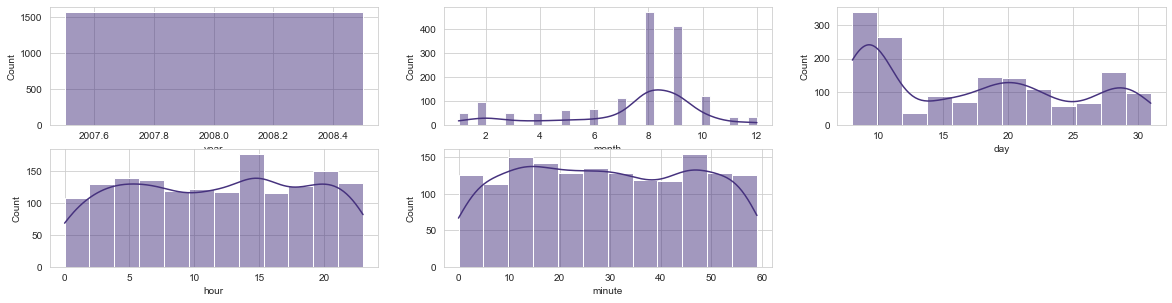

In [29]:
plt.figure(figsize=(20,10))
plt.subplot(4,3,1)
sns.histplot(df,x='year',kde=True)
plt.subplot(4,3,2)
sns.histplot(df,x='month',kde=True )
plt.subplot(4,3,3)
sns.histplot(df,x='day',kde=True )
plt.subplot(4,3,4)
sns.histplot(df,x='hour',kde=True )
plt.subplot(4,3,5)
sns.histplot(df,x='minute',kde=True )

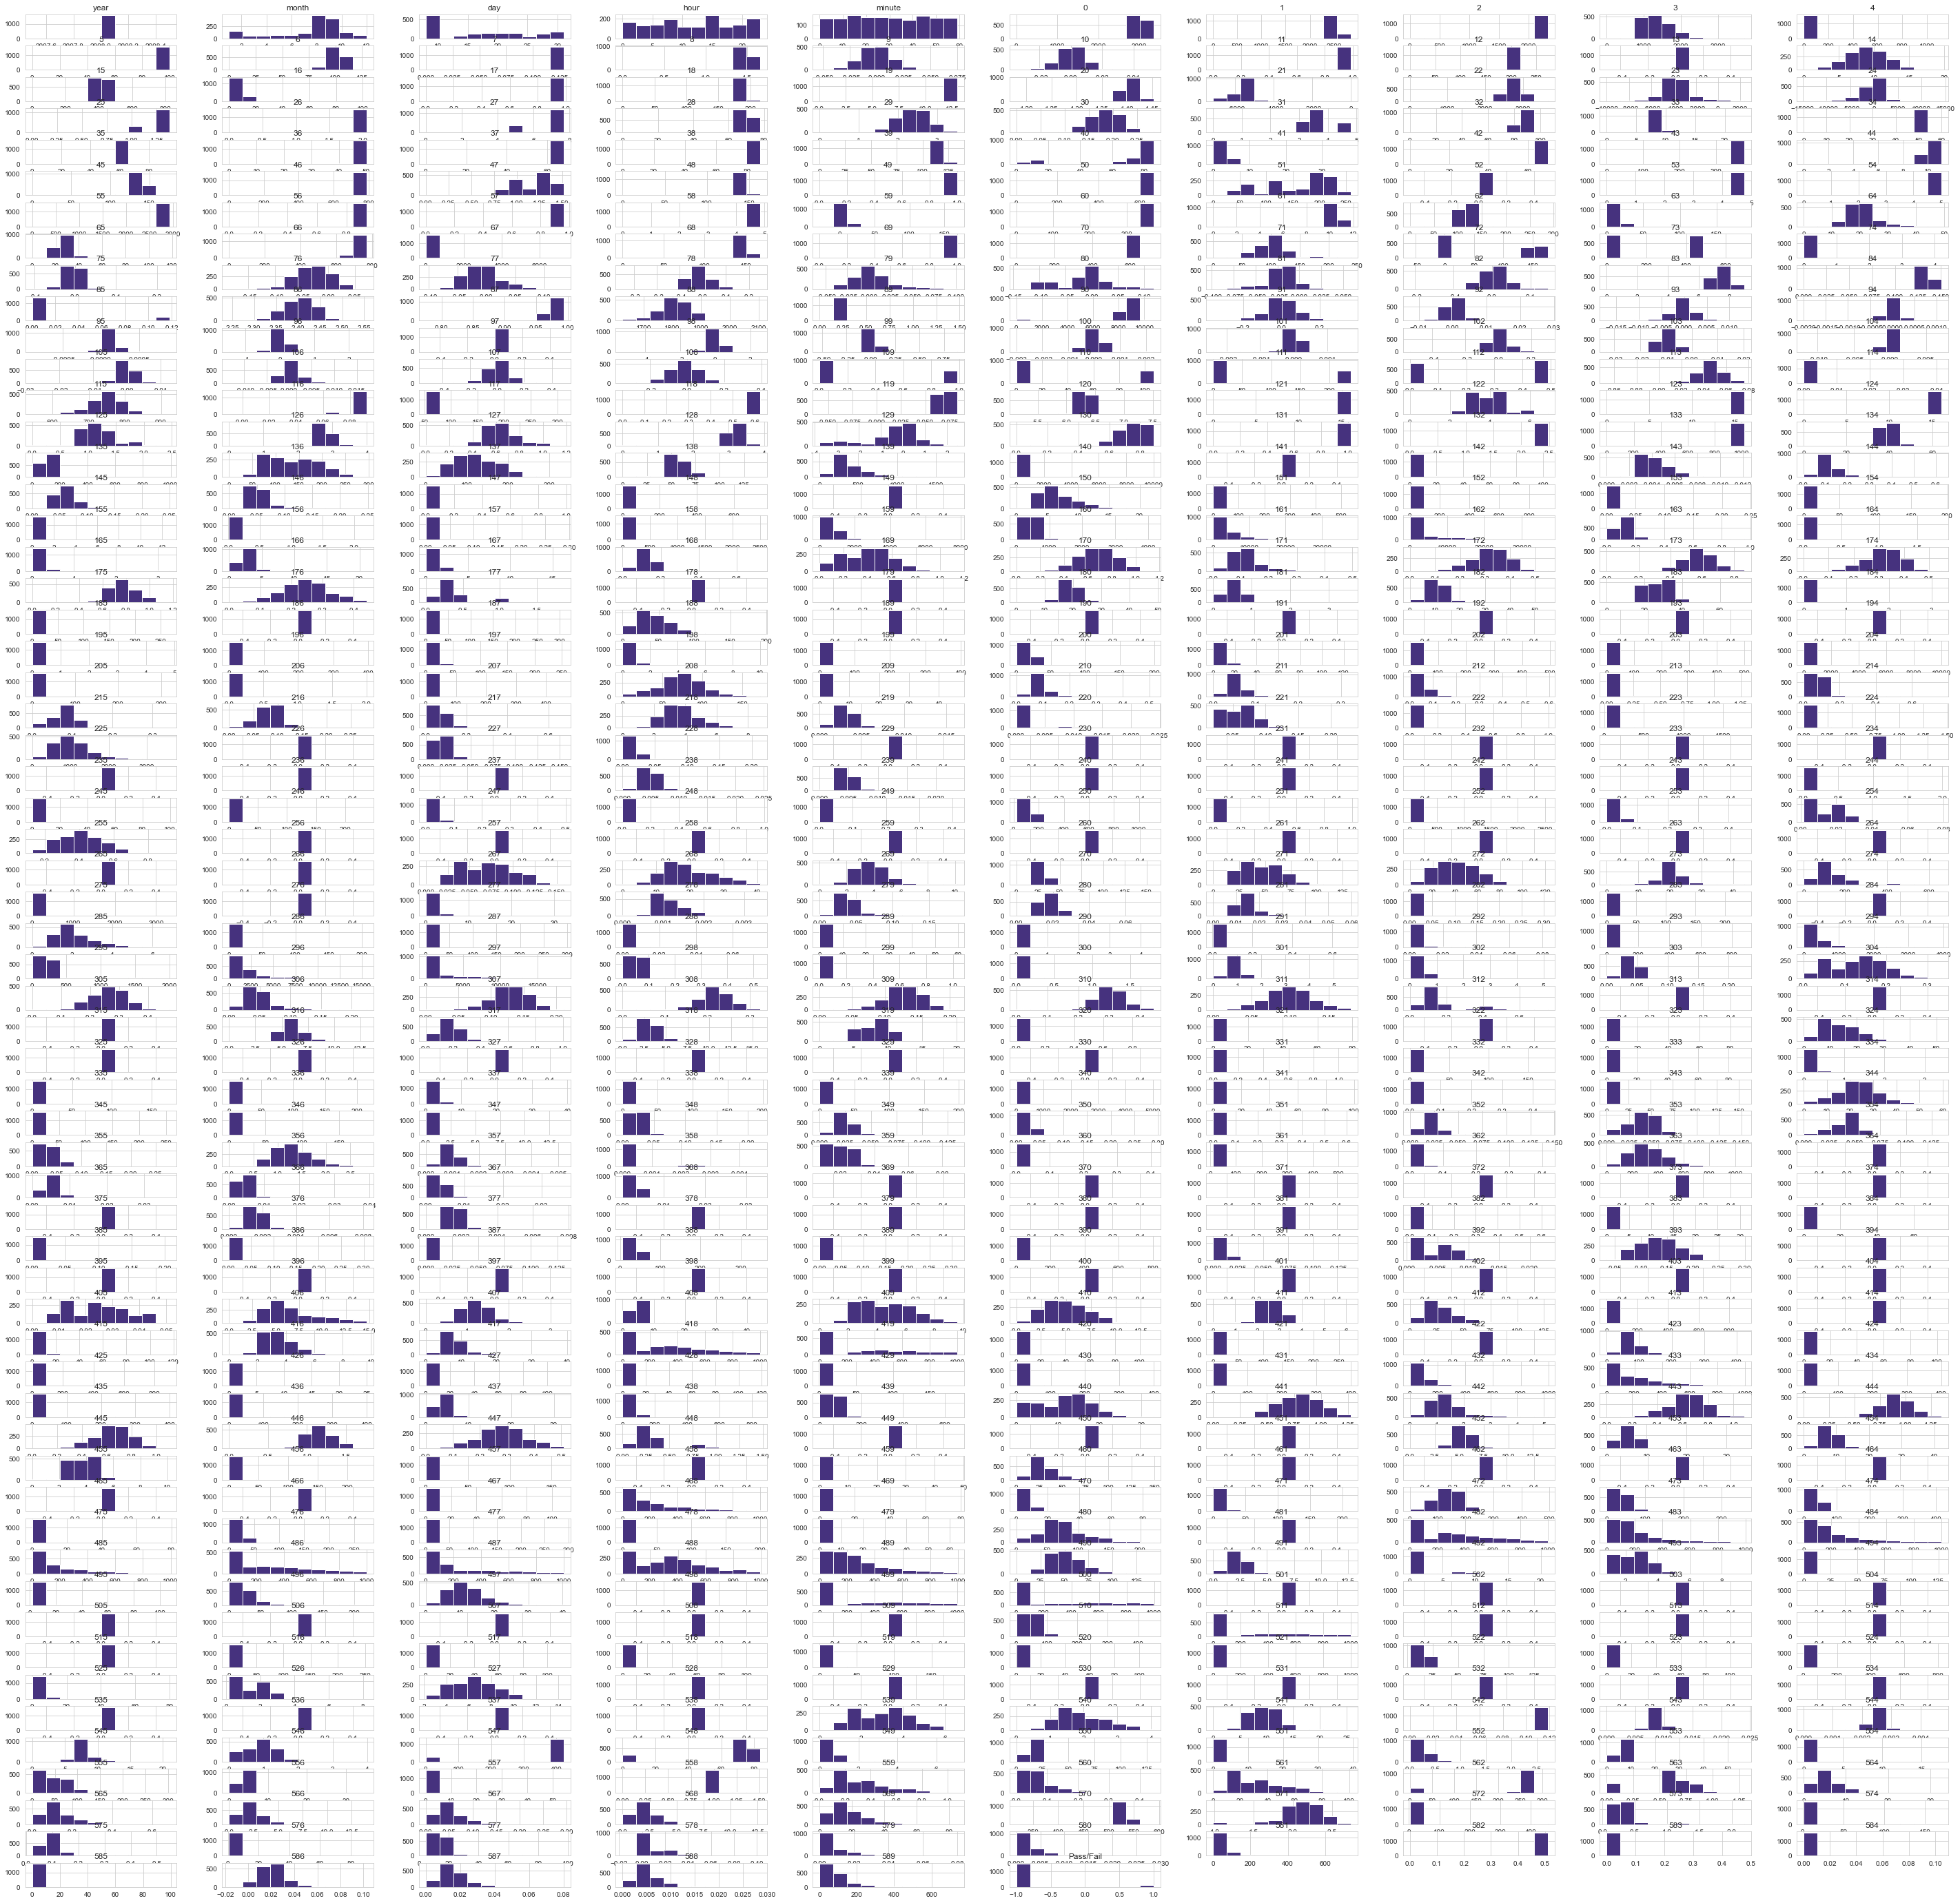

In [30]:
df.hist(layout=(60,10), figsize=(50,50))

plt.show()

# Multivariate Analysis

<AxesSubplot:>

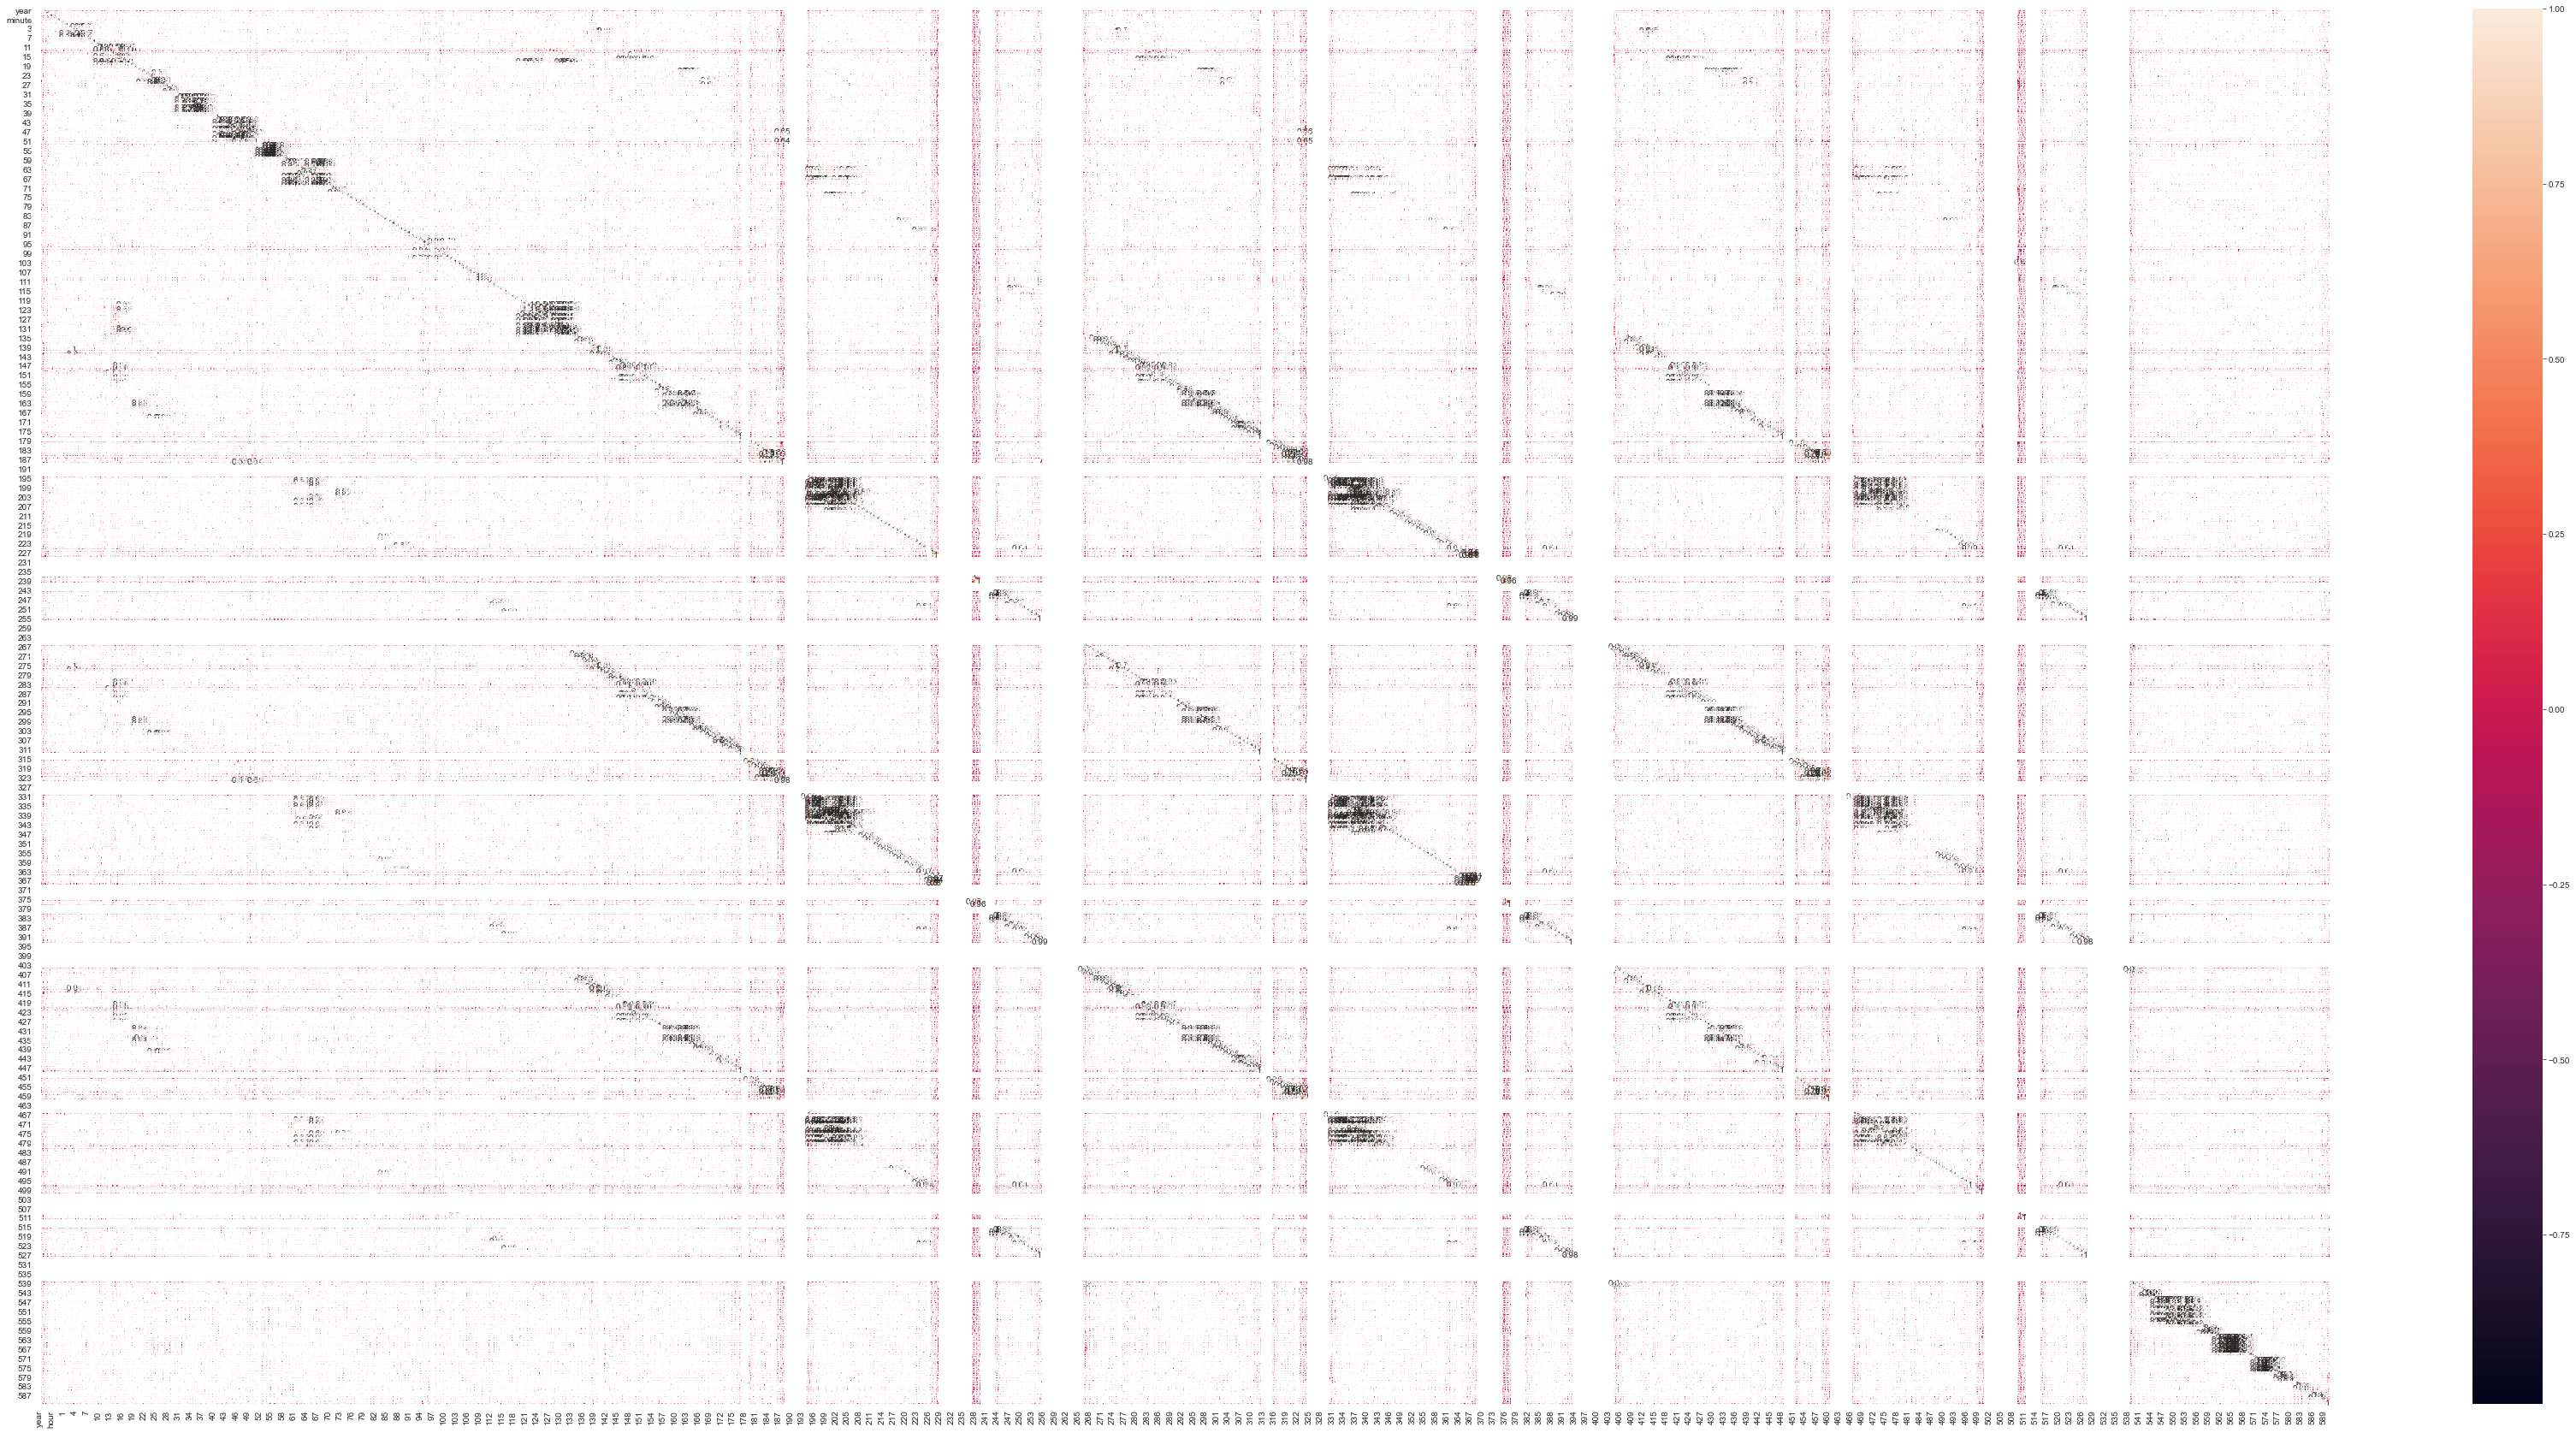

In [31]:
plt.figure(figsize=(60,30))
sns.heatmap(df.corr(), annot=True)  # plot the correlation coefficients as a heatmap

In [32]:
df.corr()

year     month       day      hour    minute         0         1  \
year        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
month       NaN  1.000000  0.407196  0.020851 -0.009937  0.041164  0.040728   
day         NaN  0.407196  1.000000 -0.013218  0.011992  0.021655  0.001293   
hour        NaN  0.020851 -0.013218  1.000000 -0.032017  0.017790 -0.022663   
minute      NaN -0.009937  0.011992 -0.032017  1.000000 -0.020684  0.017189   
...         ...       ...       ...       ...       ...       ...       ...   
586         NaN  0.036718  0.090467  0.056993  0.027551  0.044745 -0.009219   
587         NaN  0.005634 -0.001562  0.033304  0.027471  0.005233  0.039479   
588         NaN  0.015714 -0.004422  0.027461  0.018088  0.003918  0.040500   
589         NaN  0.030385 -0.055637 -0.012927  0.044280  0.021489  0.044464   
Pass/Fail   NaN -0.020689  0.000713  0.015963  0.010431  0.006149 -0.019672   

                  2         3         4  ...       581       582       583  \
year            NaN       NaN       NaN  ...       NaN       NaN       NaN   
month     -0.095560  0.167664  0.006737  ...  0.061176 -0.009705  0.009169   
day        0.016437  0.078785 -0.048604  ... -0.039355  0.011286  0.001354   
hour      -0.021780  0.006600 -0.035122  ...  0.042612 -0.044972  0.038912   
minute    -0.005863  0.014089  0.014813  ...  0.010240 -0.021464  0.010206   
...             ...       ...       ...  ...       ...       ...       ...   
586        0.015733  0.038755 -0.043693  ... -0.206109 -0.008240  0.002391   
587       -0.007090 -0.038371 -0.030930  ...  0.227096  0.018981 -0.001809   
588       -0.009122 -0.033648 -0.026046  ...  0.216292  0.019083 -0.001445   
589       -0.030434 -0.084449  0.050741  ...  0.431632  0.028502 -0.002453   
Pass/Fail  0.024929 -0.016341 -0.013577  ...  0.003478  0.018736  0.006131   

                584       585       586       587       588       589  \
year            NaN       NaN       NaN       NaN       NaN       NaN   
month      0.012597  0.009184  0.036718  0.005634  0.015714  0.030385   
day        0.005884  0.000972  0.090467 -0.001562 -0.004422 -0.055637   
hour       0.036989  0.039060  0.056993  0.033304  0.027461 -0.012927   
minute     0.008674  0.009569  0.027551  0.027471  0.018088  0.044280   
...             ...       ...       ...       ...       ...       ...   
586        0.001602  0.002872  1.000000  0.169634  0.165942 -0.484741   
587       -0.001696 -0.002122  0.169634  1.000000  0.974332  0.391503   
588       -0.001182 -0.001746  0.165942  0.974332  1.000000  0.389898   
589       -0.002750 -0.003266 -0.484741  0.391503  0.389898  1.000000   
Pass/Fail  0.005593  0.005179  0.004448  0.035670  0.031447 -0.002472   

           Pass/Fail  
year             NaN  
month      -0.020689  
day         0.000713  
hour        0.015963  
minute      0.010431  
...              ...  
586         0.004448  
587         0.035670  
588         0.031447  
589        -0.002472  
Pass/Fail   1.000000  

[596 rows x 596 columns]

4. Data pre-processing:
    
• Segregate predictors vs target attributes
• Check for target balancing and fix it if found imbalanced.
• Perform train-test split and standardise the data or vice versa if required.
• Check if the train and test data have similar statistical characteristics when compared with original data

In [33]:
y=df.pop('Pass/Fail')

In [34]:
df.pop('Time')

0       2008-07-19 11:55:00
1       2008-07-19 12:32:00
2       2008-07-19 13:17:00
3       2008-07-19 14:43:00
4       2008-07-19 15:22:00
               ...         
1562    2008-10-16 15:13:00
1563    2008-10-16 20:49:00
1564    2008-10-17 05:26:00
1565    2008-10-17 06:01:00
1566    2008-10-17 06:07:00
Name: Time, Length: 1567, dtype: object

In [35]:
df_std = pd.DataFrame(StandardScaler().fit_transform(df))

In [36]:
t=df.columns

In [37]:
df_std.columns=t

In [38]:
X=df_std

In [39]:
X.describe()

year         month           day          hour        minute  \
count  1567.0  1.567000e+03  1.567000e+03  1.567000e+03  1.567000e+03   
mean      0.0  7.076520e-16 -1.637260e-16 -9.097169e-17  9.493930e-18   
std       0.0  1.000319e+00  1.000319e+00  1.000319e+00  1.000319e+00   
min       0.0 -2.509970e+00 -1.215154e+00 -1.712630e+00 -1.710940e+00   
25%       0.0 -1.604342e-01 -9.523861e-01 -8.403578e-01 -8.400946e-01   
50%       0.0  2.311552e-01 -3.269923e-02  3.191467e-02 -2.730539e-02   
75%       0.0  6.227445e-01  7.556038e-01  9.041872e-01  9.015965e-01   
max       0.0  1.797513e+00  1.806675e+00  1.631081e+00  1.714386e+00   

                  0             1             2             3             4  \
count  1.567000e+03  1.567000e+03  1.567000e+03  1.567000e+03  1.567000e+03   
mean   1.183199e-17 -9.915489e-16  1.299464e-15 -2.323887e-17 -4.587109e-17   
std    1.000319e+00  1.000319e+00  1.000319e+00  1.000319e+00  1.000319e+00   
min   -1.500399e+01 -1.344850e+01 -1.042788e+01 -3.016410e+00 -7.416245e-02   
25%   -1.860722e-01 -1.796196e-01 -8.943069e-04 -6.621427e-01 -5.613673e-02   
50%    4.001864e-02  7.690689e-02  9.595756e-02 -2.189761e-01 -5.080391e-02   
75%    2.679582e-01  2.925147e-01  1.777205e-01  4.495924e-01 -4.708287e-02   
max    1.765954e+00  1.957920e+00  6.425345e-01  5.081054e+00  1.979756e+01   

       ...           580           581           582           583  \
count  ...  1.567000e+03  1.567000e+03  1.567000e+03  1.567000e+03   
mean   ... -1.281255e-15 -8.860529e-16 -3.692705e-15 -1.974950e-17   
std    ...  1.000319e+00  1.000319e+00  1.000319e+00  1.000319e+00   
min    ... -6.482348e-01 -5.301951e-01 -3.821056e+01 -8.913818e-01   
25%    ... -6.482348e-01 -5.301951e-01 -1.435084e-01 -2.159151e-01   
50%    ... -6.482348e-01 -5.301951e-01  3.233856e-02 -8.780934e-02   
75%    ...  5.397453e-01  2.584275e-01  1.967173e-01  6.941137e-02   
max    ...  8.063619e+00  9.590916e+00  7.663086e-01  2.686098e+01   

                584           585           586           587           588  \
count  1.567000e+03  1.567000e+03  1.567000e+03  1.567000e+03  1.567000e+03   
mean  -2.484186e-18 -4.137653e-17  3.391600e-16  1.892144e-16  3.707947e-16   
std    1.000319e+00  1.000319e+00  1.000319e+00  1.000319e+00  1.000319e+00   
min   -1.033543e+00 -8.572048e-01 -3.101780e+00 -1.868461e+00 -1.840769e+00   
25%   -2.000616e-01 -2.124004e-01 -6.507543e-01 -6.655201e-01 -6.902799e-01   
50%   -6.562914e-02 -8.619069e-02 -7.642147e-02 -1.888833e-01 -2.370571e-01   
75%    6.880336e-02  6.405026e-02  4.979114e-01  4.352840e-01  3.904823e-01   
max    2.706285e+01  2.690758e+01  6.580986e+00  7.198987e+00  8.130134e+00   

                589  
count  1.567000e+03  
mean   8.218626e-17  
std    1.000319e+00  
min   -1.061159e+00  
25%   -5.884774e-01  
50%   -2.964709e-01  
75%    1.613287e-01  
max    6.793729e+00  

[8 rows x 595 columns]

In [41]:
test.pop('Time')

0    2008-07-19 11:55:00
1    2008-07-19 12:32:00
2    2008-07-19 13:17:00
3    2008-07-19 14:43:00
4    2008-07-19 15:22:00
5    2008-07-19 17:53:00
6    2008-07-19 19:44:00
7    2008-07-19 19:45:00
8    2008-07-19 20:24:00
9    2008-07-19 21:35:00
10   2008-07-19 21:57:00
11   2008-07-19 22:52:00
12   2008-07-20 03:35:00
13   2008-07-21 08:21:00
14   2008-07-21 11:53:00
15   2008-07-22 00:03:00
16   2008-07-22 02:59:00
17   2008-07-22 08:41:00
Name: Time, dtype: datetime64[ns]

In [42]:
test_std=pd.DataFrame(StandardScaler().fit_transform(test))

In [43]:
t=test.columns

In [44]:
test_std.columns=t

In [45]:
X_test=test_std

In [46]:
from sklearn.model_selection import train_test_split



# split into train and test
#There is a possibilty that there is a imbalance when we split  train and test ,the either dataset may have bias towards single category
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=7)

In [47]:
y.value_counts()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

In [48]:
X_train.describe()

year        month          day         hour       minute  \
count  1253.0  1253.000000  1253.000000  1253.000000  1253.000000   
mean      0.0     0.007390     0.002427     0.026345     0.003646   
std       0.0     1.003186     0.997218     0.992373     1.006125   
min       0.0    -2.509970    -1.215154    -1.712630    -1.710940   
25%       0.0    -0.160434    -0.952386    -0.840358    -0.840095   
50%       0.0     0.231155    -0.032699     0.031915    -0.027305   
75%       0.0     0.622745     0.755604     0.904187     0.901597   
max       0.0     1.797513     1.806675     1.631081     1.714386   

                 0            1            2            3            4  ...  \
count  1253.000000  1253.000000  1253.000000  1253.000000  1253.000000  ...   
mean     -0.000508    -0.005357     0.001302     0.016993    -0.003097  ...   
std       1.021707     0.954070     0.992077     1.023091     0.969156  ...   
min     -15.003994   -13.448497   -10.427881    -3.016410    -0.074162  ...   
25%      -0.190569    -0.188686    -0.001585    -0.661309    -0.056265  ...   
50%       0.042017     0.069708     0.092504    -0.218976    -0.050804  ...   
75%       0.270407     0.289186     0.177720     0.456027    -0.046960  ...   
max       1.765954     1.957920     0.642534     5.081054    19.797564  ...   

               580          581          582          583          584  \
count  1253.000000  1253.000000  1253.000000  1253.000000  1253.000000   
mean      0.003529    -0.000861     0.024235    -0.017655    -0.016191   
std       0.979620     0.977664     0.254433     0.806570     0.804177   
min      -0.648235    -0.530195    -1.680258    -0.542002    -0.576473   
25%      -0.648235    -0.530195    -0.135863    -0.221738    -0.200062   
50%      -0.648235    -0.530195     0.024693    -0.093632    -0.065629   
75%       0.539745     0.261905     0.192895     0.057765     0.068803   
max       8.063619     9.590916     0.766309    26.558188    26.901531   

               585          586          587          588          589  
count  1253.000000  1253.000000  1253.000000  1253.000000  1253.000000  
mean     -0.017482     0.011307    -0.023547    -0.019224    -0.028563  
std       0.806554     1.002941     0.983050     0.988162     0.964285  
min      -0.522389    -3.101780    -1.868461    -1.840769    -1.061159  
25%      -0.213071    -0.626487    -0.665520    -0.690280    -0.591132  
50%      -0.089881    -0.052154    -0.188883    -0.237057    -0.304644  
75%       0.055369     0.497911     0.401238     0.355619     0.145715  
max      26.728526     6.580986     7.198987     8.130134     6.793729  

[8 rows x 595 columns]

In [49]:
X_val.describe()

year       month         day        hour      minute           0  \
count  314.0  314.000000  314.000000  314.000000  314.000000  314.000000   
mean     0.0   -0.029489   -0.009686   -0.105130   -0.014548    0.002029   
std      0.0    0.989832    1.014149    1.026306    0.978250    0.911505   
min      0.0   -2.509970   -1.215154   -1.712630   -1.710940  -15.003994   
25%      0.0   -0.160434   -0.952386   -0.985737   -0.840095   -0.150173   
50%      0.0    0.231155    0.098685   -0.113464   -0.027305    0.038745   
75%      0.0    0.622745    0.755604    0.758808    0.901597    0.259389   
max      0.0    1.797513    1.806675    1.631081    1.714386    1.090729   

                1           2           3           4  ...         580  \
count  314.000000  314.000000  314.000000  314.000000  ...  314.000000   
mean     0.021376   -0.005195   -0.067811    0.012360  ...   -0.014083   
std      1.168254    1.034160    0.902086    1.117653  ...    1.080520   
min    -13.448497  -10.427881   -3.016410   -0.074162  ...   -0.648235   
25%     -0.134263    0.016917   -0.665042   -0.055970  ...   -0.648235   
50%      0.097123    0.100207   -0.222574   -0.050826  ...   -0.648235   
75%      0.303502    0.172674    0.411013   -0.047201  ...    0.494054   
max      1.761338    0.456960    4.678244   19.753708  ...    5.809503   

              581         582         583         584         585         586  \
count  314.000000  314.000000  314.000000  314.000000  314.000000  314.000000   
mean     0.003435   -0.096710    0.070450    0.064608    0.069762   -0.045121   
std      1.087688    2.176169    1.548529    1.553817    1.548601    0.990089   
min     -0.530195  -38.210561   -0.891382   -1.033543   -0.857205   -2.220058   
25%     -0.530195   -0.151154   -0.214459   -0.200062   -0.206277   -0.739735   
50%     -0.530195    0.039984   -0.070340   -0.065629   -0.072379   -0.145180   
75%      0.215486    0.229211    0.092703    0.088968    0.086376    0.481733   
max      9.172500    0.766309   26.860983   27.062850   26.907579    6.580986   

              587         588         589  
count  314.000000  314.000000  314.000000  
mean     0.093962    0.076713    0.113979  
std      1.062903    1.045539    1.127258  
min     -1.323733   -1.248093   -1.061159  
25%     -0.642823   -0.655417   -0.573575  
50%     -0.137815   -0.202194   -0.246608  
75%      0.537420    0.582230    0.417345  
max      5.519410    5.550250    6.469001  

[8 rows x 595 columns]

train and validation data have similar characteristics such as min,25%,50%,75% and max

# Handling target imbalance

In [50]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [51]:
y_resampled.value_counts()

-1    1162
 1    1162
Name: Pass/Fail, dtype: int64

In [52]:
from sklearn.metrics import confusion_matrix

[14:11:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9426751592356688


<AxesSubplot:>

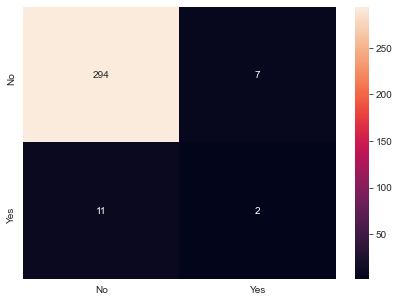

In [53]:
xg = xgb.XGBClassifier()
x= xg.fit(X_resampled, y_resampled)
y_predict = xg.predict(X_val)
print(accuracy_score(y_val,y_predict))
cm=confusion_matrix(y_val, y_predict,labels=[-1, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

5. Model training, testing and tuning:
• Model training:
- Pick up a supervised learning model.
- Train the model.
- Use cross validation techniques.
Hint: Use all CV techniques that you have learnt in the course.
- Apply hyper-parameter tuning techniques to get the best accuracy.
Suggestion: Use all possible hyper parameter combinations to extract the best accuracies.
- Use any other technique/method which can enhance the model performance.
Hint: Dimensionality reduction, attribute removal, standardisation/normalisation, target balancing etc.
- Display and explain the classification report in detail.
- Design a method of your own to check if the achieved train and test accuracies might change if a different sample population can lead to
new train and test accuracies.
Hint: You can use your concepts learnt under Applied Statistics module.
- Apply the above steps for all possible models that you have learnt so far.
• Display and compare all the models designed with their train and test accuracies.
• Select the final best trained model along with your detailed comments for selecting this model.
• Pickle the selected model for future use.
• Import the future data file. Use the same to perform the prediction using the best chosen model from above. Display the prediction results.

# CV techniques

# LOOCV

In [54]:
scores = cross_val_score(xg, X,y,cv=LeaveOneOut())


[14:11:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:11:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:11:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:11:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:13:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:13:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:13:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:13:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:14:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:15:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:15:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:15:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:15:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:16:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:16:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:16:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:16:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:17:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:17:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:17:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:17:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:18:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:19:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:19:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:19:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:19:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:20:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:20:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:20:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:20:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:21:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:21:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:21:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:21:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:22:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:22:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:22:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:22:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:23:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:23:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:23:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:23:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:24:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:24:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:24:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:24:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:25:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:25:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:25:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:25:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:26:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:26:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:26:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:26:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:27:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:27:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:27:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:27:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:28:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:28:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:28:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:28:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:29:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:29:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:29:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:29:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:30:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:30:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:30:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:30:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:31:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:31:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:31:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:31:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:32:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:32:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:32:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:32:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:33:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:33:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:33:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:33:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:34:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:34:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:34:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:34:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:35:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:35:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:35:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:35:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:36:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:36:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:36:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:37:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:37:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:37:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:38:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:38:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:38:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:39:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:39:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:39:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:40:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:40:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:40:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:40:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:41:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:41:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:41:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:41:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:42:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:42:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:42:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:42:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:43:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:43:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:43:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:43:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:44:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:44:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:44:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:44:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:45:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:45:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:45:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:45:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:46:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:46:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:46:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:46:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:47:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:47:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:47:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:47:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:48:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:48:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:48:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:48:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:49:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:49:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:49:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:49:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:50:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:50:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:50:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:50:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:51:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:51:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:51:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:51:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:52:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:52:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:52:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:52:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:53:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:53:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:53:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:53:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:54:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:54:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:54:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:54:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:55:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:55:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:55:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:55:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:56:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:56:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:56:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:56:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:57:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:57:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:57:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:57:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:58:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:58:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:58:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:58:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:59:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:59:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:59:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:00:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:00:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:00:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:01:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:01:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:01:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:02:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:02:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:02:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:03:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:03:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:03:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:03:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:04:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:04:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:04:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:04:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:05:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:05:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:05:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:05:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:06:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:06:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:06:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:06:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:07:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:07:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:07:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:07:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:08:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:08:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:08:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:08:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:09:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:09:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:09:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:09:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:10:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:10:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:10:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:10:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:11:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:11:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:11:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:11:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:12:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [55]:
scores

array([1., 1., 0., ..., 1., 1., 1.])

In [56]:
scores.mean()

0.9342693044033185

In [57]:
scores.std()

0.24781075693572696

Accuracy of the XG model is 93% based on LOOCV.

# K-fold CV

In [58]:
num_folds = 10


In [59]:
kfold = KFold(n_splits=num_folds)

In [60]:
results = cross_val_score(xg,X, y, cv=kfold)

[15:12:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:12:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:12:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:12:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [61]:
results

array([0.85987261, 0.84713376, 0.91082803, 0.95541401, 0.98726115,
       0.94267516, 0.98726115, 0.93589744, 0.91666667, 0.98076923])

In [62]:
np.mean(abs(results))

0.9323779193205943

Mean accuracy achieved is 93 % and highest accuracy possible is 98%

In [63]:
results.std()

0.04716986974611196

# Stratified Kfold CV

In [64]:
k = 10
stratified_kfold = StratifiedKFold(n_splits = k)
results = cross_val_score(xg, X, y, cv = stratified_kfold)

[15:12:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:12:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:12:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:12:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [65]:
results

array([0.56050955, 0.78980892, 0.92993631, 0.92993631, 0.92993631,
       0.92993631, 0.92993631, 0.93589744, 0.93589744, 0.93589744])

Maximum accuracy achieved is 93 %

In [66]:
print('Accuracy Score')
print('Avearge: ', results.mean())
print('Standard deviation: ', results.std())

Accuracy Score
Avearge:  0.8807692307692309
Standard deviation:  0.11491057498065067


Mean accuracy achieved is 88 % and highest accuracy possible is 93%

# Bootstrapping CV

In [67]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [68]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    xg.fit(X_, y_)
    y_pred = xg.predict(X_val)
    
    acc = accuracy_score(y_pred, y_val)
    accuracy.append(acc)

[15:13:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:13:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:13:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:13:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [69]:
accuracy

[0.9617834394904459,
 0.9585987261146497,
 0.9554140127388535,
 0.9585987261146497,
 0.9585987261146497,
 0.9554140127388535,
 0.9522292993630573,
 0.9585987261146497,
 0.9554140127388535,
 0.9585987261146497]

Maximum accuracy achieved is 96%

In [70]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.9573248407643312
Standard deviation:  0.002547770700636942


Average accuracy achieved is 95

Highest average accuracy achieved by Bootstrapping

# Hyper parameter tuning

In [71]:
parameters = {'bootstrap': [True],'max_depth': [10, 20, 30, 40, 50],'max_features': ['auto', 'sqrt'],'min_samples_leaf': [1, 2, 4, 8],'n_estimators': [100]}

In [72]:
clf =GridSearchCV(xg, parameters, cv = 5, verbose = 2, n_jobs= 4)

In [73]:
clf.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[15:24:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:24:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=-1, importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=8,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
           

In [74]:
clf.best_params_


{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [86]:
xg = xgb.XGBClassifier(bootstrap=True,max_depth=10,max_features='auto',min_samples_leaf=1,n_estimators=100)

[15:26:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:26:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9522292993630573


<AxesSubplot:>

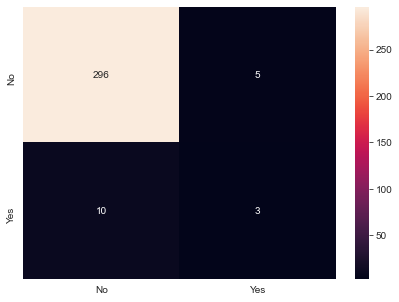

In [87]:
x= xg.fit(X_resampled, y_resampled)
y_predict = xg.predict(X_val)
print(accuracy_score(y_val,y_predict))
cm=confusion_matrix(y_val, y_predict,labels=[-1, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

Accuracy is improved using hyperparameter tuning

# Dimensionality Reduction

In [88]:
from sklearn.decomposition import PCA
pca = PCA(500)# Initialize PCA object
pca.fit(X_resampled)  # Fit the PCA object with the train data

PCA(n_components=500)

In [89]:
pca.explained_variance_

array([2.72268172e+01, 2.38619886e+01, 1.39103616e+01, 1.20502505e+01,
       9.29830356e+00, 8.45146580e+00, 8.03395217e+00, 7.53132995e+00,
       7.16859209e+00, 6.91200253e+00, 6.68585558e+00, 6.39101672e+00,
       6.17737810e+00, 6.13274677e+00, 5.89973919e+00, 5.87707544e+00,
       5.56091761e+00, 5.39331820e+00, 5.10177767e+00, 4.79244853e+00,
       4.67474353e+00, 4.43413901e+00, 4.29980432e+00, 4.08302250e+00,
       4.00146754e+00, 3.90660450e+00, 3.88732648e+00, 3.78870998e+00,
       3.69743764e+00, 3.66504652e+00, 3.58887189e+00, 3.54665659e+00,
       3.39452341e+00, 3.26621011e+00, 3.18434948e+00, 3.10915472e+00,
       3.03107563e+00, 3.00234920e+00, 2.91150057e+00, 2.82440921e+00,
       2.68644558e+00, 2.66468738e+00, 2.62283941e+00, 2.60447575e+00,
       2.57019104e+00, 2.50582960e+00, 2.46055490e+00, 2.41716203e+00,
       2.33175065e+00, 2.26660494e+00, 2.20724955e+00, 2.16064028e+00,
       2.10308587e+00, 2.08619798e+00, 2.06014379e+00, 1.98100189e+00,
      

In [90]:
print(pca.components_)

[[-4.61021237e-19 -1.80099584e-02 -1.23603779e-02 ...  1.42655127e-02
   1.24723217e-02  9.38938600e-03]
 [-3.69879281e-19 -1.82359973e-02  4.86787084e-03 ...  2.81781876e-02
   2.58557299e-02  1.89125883e-02]
 [ 1.04405083e-19 -1.28563466e-02 -3.29944615e-02 ... -5.17068357e-04
  -4.97337922e-03 -1.24731022e-02]
 ...
 [ 0.00000000e+00  5.48917905e-17  3.37675956e-17 ... -5.68596277e-17
   1.08230482e-16 -7.26415456e-18]
 [-0.00000000e+00 -6.45043279e-18 -7.20094550e-17 ... -5.07135566e-17
   8.22909449e-17 -2.77555756e-17]
 [ 0.00000000e+00  5.30885766e-17  5.30848414e-17 ... -6.03409331e-17
   6.02545357e-17 -4.77048956e-18]]


In [91]:
print(pca.explained_variance_ratio_)

[6.79799627e-02 5.95786531e-02 3.47314141e-02 3.00870855e-02
 2.32160199e-02 2.11016339e-02 2.00591852e-02 1.88042372e-02
 1.78985527e-02 1.72578995e-02 1.66932554e-02 1.59571012e-02
 1.54236880e-02 1.53122524e-02 1.47304787e-02 1.46738918e-02
 1.38845084e-02 1.34660459e-02 1.27381270e-02 1.19657935e-02
 1.16719075e-02 1.10711657e-02 1.07357586e-02 1.01944974e-02
 9.99087084e-03 9.75401666e-03 9.70588325e-03 9.45965742e-03
 9.23176847e-03 9.15089428e-03 8.96070134e-03 8.85529811e-03
 8.47545172e-03 8.15507885e-03 7.95068910e-03 7.76294271e-03
 7.56799469e-03 7.49627049e-03 7.26943949e-03 7.05198963e-03
 6.70752181e-03 6.65319591e-03 6.54870982e-03 6.50285939e-03
 6.41725729e-03 6.25655953e-03 6.14351758e-03 6.03517419e-03
 5.82191892e-03 5.65926299e-03 5.51106436e-03 5.39469026e-03
 5.25098832e-03 5.20882261e-03 5.14377045e-03 4.94616884e-03
 4.90653377e-03 4.78665177e-03 4.73343781e-03 4.51035318e-03
 4.45200463e-03 4.34366747e-03 4.19392090e-03 4.13265640e-03
 4.05708290e-03 3.975429

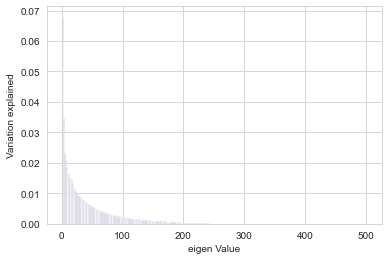

In [92]:
plt.bar(list(range(1,501)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

We can see almost 90 % of data can be explained by 200 components.

In [93]:
pca = PCA(200)# Initialize PCA object
pca.fit(X_resampled)  # Fit the PCA object with the train data

PCA(n_components=200)

In [94]:
pca.explained_variance_

array([27.22681722, 23.86198862, 13.91036162, 12.05025048,  9.29830356,
        8.4514658 ,  8.03395217,  7.53132995,  7.16859209,  6.91200253,
        6.68585558,  6.39101672,  6.1773781 ,  6.13274677,  5.89973919,
        5.87707544,  5.56091761,  5.3933182 ,  5.10177767,  4.79244853,
        4.67474353,  4.43413901,  4.29980432,  4.0830225 ,  4.00146754,
        3.9066045 ,  3.88732648,  3.78870998,  3.69743764,  3.66504652,
        3.58887189,  3.54665659,  3.39452341,  3.26621011,  3.18434948,
        3.10915472,  3.03107563,  3.0023492 ,  2.91150057,  2.82440921,
        2.68644558,  2.66468738,  2.62283941,  2.60447575,  2.57019104,
        2.5058296 ,  2.4605549 ,  2.41716203,  2.33175065,  2.26660494,
        2.20724955,  2.16064028,  2.10308587,  2.08619798,  2.06014379,
        1.98100189,  1.96512756,  1.91711333,  1.89580048,  1.80645232,
        1.78308301,  1.73969263,  1.67971727,  1.65518008,  1.62491196,
        1.59220863,  1.58712835,  1.57193785,  1.51534944,  1.49

In [95]:
X_train_pca = pca.transform(X_resampled)  # PCs for the train data
X_val_pca = pca.transform(X_val)    # PCs for the val data

X_train_pca.shape, X_val_pca.shape

((2324, 200), (314, 200))

In [97]:
X_test_pca = pca.transform(X_test)

In [98]:
x.fit(X_train_pca, y_resampled)

[15:28:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:28:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', bootstrap=True,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=10,
              max_features='auto', min_child_weight=1, min_samples_leaf=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=8, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, ...)

0.9585987261146497


<AxesSubplot:>

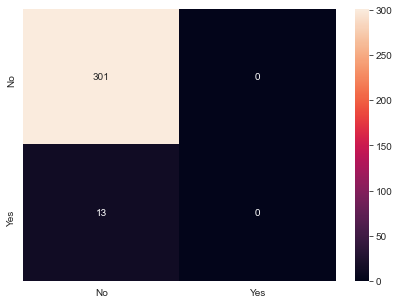

In [99]:
y_predict = xg.predict(X_val_pca)
print(accuracy_score(y_val,y_predict))
cm=confusion_matrix(y_val, y_predict,labels=[-1, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Classification Report

In [100]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_predict))

              precision    recall  f1-score   support

          -1       0.96      1.00      0.98       301
           1       0.00      0.00      0.00        13

    accuracy                           0.96       314
   macro avg       0.48      0.50      0.49       314
weighted avg       0.92      0.96      0.94       314



- Design a method of your own to check if the achieved train and test accuracies might change if a different sample population can lead to
new train and test accuracies?
Ans:Based on cross validation we already know different samples leads to different accuracies

 Display and compare all the models designed with their train and test accuracies

In [101]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier()
cb = CatBoostClassifier()
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

In [102]:
ensemble_clf=[dt,rf,gbcl,abcl,xg] 

In [103]:
param1={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }
param2={"n_estimators":[100, 300, 500, 800, 1200],"max_depth":range(5,30,5),"min_samples_split":range(1,100,5)}
param5={'base_estimator__max_depth':[i for i in range(2,11,2)],'base_estimator__min_samples_leaf':[5,10],'n_estimators':[10,50,250,1000],'learning_rate':[0.01,0.1]}
param3={'min_samples_split':range(200,1001,200),'min_samples_leaf':range(30,71,10),'max_depth':range(5,30,5),'learning_rate':[0.01,0.1,0.8,0.003,0.04]}
param6={'learning_rate':[0.1,0.8,0.01,0.03],'max_depth':range(5,16,2),'min_child_weight':range(1,6,2),'gamma':[0.1,0.5,0.01]}
param4={'learning_rate': [0.03, 0.1,0.2,0.5],'depth':range(5,16,2),'l2_leaf_reg': range(1,20,2)}

param=[param1,param2,param3,param5,param6]
model_log=["_dt", "_rf", "_gbcl","_cb","_abcl","_xg"]

In [104]:
for i in range(len(ensemble_clf)):
    ran=RandomizedSearchCV(estimator=ensemble_clf[i], param_distributions=param[i], 
                      n_jobs=-1, cv=3, verbose=3)
    ran.fit(X_train_pca, y_resampled)
    globals()['Grid%s' % model_log[i]]=pd.DataFrame(ran.cv_results_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[15:43:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:43:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. E

In [126]:
print(ran.best_estimator_) #getting best estimator using randomsearchcv
print(ran.best_params_)
print(ran.best_score_)

XGBClassifier(base_score=0.5, booster='gbtree', bootstrap=True,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              enable_categorical=False, gamma=0.1, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=11,
              max_features='auto', min_child_weight=1, min_samples_leaf=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=8, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, ...)
{'min_child_weight': 1, 'max_depth': 11, 'learning_rate': 0.1, 'gamma': 0.1}
0.9918274012947682


In [105]:
dt.fit(X_train_pca, y_resampled)
score1 = dt.score(X_val_pca, y_val)

In [106]:
rf.fit(X_train_pca,y_resampled)
score2 = rf.score(X_val_pca, y_val)

In [107]:
gbcl.fit(X_train_pca,y_resampled)
score3 = gbcl.score(X_val_pca, y_val)

In [108]:
cb.fit(X_train_pca,y_resampled)
score4 = cb.score(X_val_pca, y_val)

Learning rate set to 0.014768
0:	learn: 0.6824270	total: 197ms	remaining: 3m 16s
1:	learn: 0.6710884	total: 241ms	remaining: 2m
2:	learn: 0.6618595	total: 280ms	remaining: 1m 33s
3:	learn: 0.6522406	total: 306ms	remaining: 1m 16s
4:	learn: 0.6417085	total: 327ms	remaining: 1m 5s
5:	learn: 0.6306901	total: 348ms	remaining: 57.7s
6:	learn: 0.6209745	total: 369ms	remaining: 52.3s
7:	learn: 0.6101088	total: 391ms	remaining: 48.5s
8:	learn: 0.6007589	total: 415ms	remaining: 45.7s
9:	learn: 0.5909487	total: 438ms	remaining: 43.3s
10:	learn: 0.5809532	total: 458ms	remaining: 41.2s
11:	learn: 0.5712695	total: 479ms	remaining: 39.5s
12:	learn: 0.5612849	total: 499ms	remaining: 37.9s
13:	learn: 0.5535888	total: 521ms	remaining: 36.7s
14:	learn: 0.5459623	total: 542ms	remaining: 35.6s
15:	learn: 0.5383798	total: 564ms	remaining: 34.7s
16:	learn: 0.5294551	total: 586ms	remaining: 33.9s
17:	learn: 0.5213051	total: 612ms	remaining: 33.4s
18:	learn: 0.5134208	total: 635ms	remaining: 32.8s
19:	learn: 

164:	learn: 0.1154443	total: 4.32s	remaining: 21.9s
165:	learn: 0.1147110	total: 4.34s	remaining: 21.8s
166:	learn: 0.1138700	total: 4.37s	remaining: 21.8s
167:	learn: 0.1130971	total: 4.39s	remaining: 21.7s
168:	learn: 0.1123738	total: 4.41s	remaining: 21.7s
169:	learn: 0.1115354	total: 4.43s	remaining: 21.6s
170:	learn: 0.1107961	total: 4.45s	remaining: 21.6s
171:	learn: 0.1098720	total: 4.48s	remaining: 21.6s
172:	learn: 0.1090418	total: 4.5s	remaining: 21.5s
173:	learn: 0.1081285	total: 4.52s	remaining: 21.5s
174:	learn: 0.1074554	total: 4.55s	remaining: 21.4s
175:	learn: 0.1067263	total: 4.57s	remaining: 21.4s
176:	learn: 0.1058858	total: 4.59s	remaining: 21.3s
177:	learn: 0.1051981	total: 4.61s	remaining: 21.3s
178:	learn: 0.1044120	total: 4.63s	remaining: 21.3s
179:	learn: 0.1036493	total: 4.67s	remaining: 21.3s
180:	learn: 0.1030169	total: 4.7s	remaining: 21.3s
181:	learn: 0.1022153	total: 4.72s	remaining: 21.2s
182:	learn: 0.1014821	total: 4.75s	remaining: 21.2s
183:	learn: 0.

329:	learn: 0.0441536	total: 8.18s	remaining: 16.6s
330:	learn: 0.0439222	total: 8.21s	remaining: 16.6s
331:	learn: 0.0436931	total: 8.23s	remaining: 16.6s
332:	learn: 0.0434625	total: 8.25s	remaining: 16.5s
333:	learn: 0.0432399	total: 8.28s	remaining: 16.5s
334:	learn: 0.0430590	total: 8.3s	remaining: 16.5s
335:	learn: 0.0428804	total: 8.32s	remaining: 16.4s
336:	learn: 0.0426784	total: 8.35s	remaining: 16.4s
337:	learn: 0.0424530	total: 8.37s	remaining: 16.4s
338:	learn: 0.0421924	total: 8.4s	remaining: 16.4s
339:	learn: 0.0420035	total: 8.42s	remaining: 16.3s
340:	learn: 0.0417772	total: 8.44s	remaining: 16.3s
341:	learn: 0.0415835	total: 8.46s	remaining: 16.3s
342:	learn: 0.0413605	total: 8.49s	remaining: 16.3s
343:	learn: 0.0411774	total: 8.51s	remaining: 16.2s
344:	learn: 0.0409677	total: 8.53s	remaining: 16.2s
345:	learn: 0.0407532	total: 8.55s	remaining: 16.2s
346:	learn: 0.0405753	total: 8.6s	remaining: 16.2s
347:	learn: 0.0404139	total: 8.63s	remaining: 16.2s
348:	learn: 0.0

490:	learn: 0.0212616	total: 12.8s	remaining: 13.2s
491:	learn: 0.0212113	total: 12.8s	remaining: 13.2s
492:	learn: 0.0211131	total: 12.8s	remaining: 13.2s
493:	learn: 0.0210404	total: 12.9s	remaining: 13.2s
494:	learn: 0.0209538	total: 12.9s	remaining: 13.1s
495:	learn: 0.0208685	total: 12.9s	remaining: 13.1s
496:	learn: 0.0207470	total: 12.9s	remaining: 13.1s
497:	learn: 0.0206469	total: 13s	remaining: 13.1s
498:	learn: 0.0205596	total: 13s	remaining: 13.1s
499:	learn: 0.0204837	total: 13s	remaining: 13s
500:	learn: 0.0203874	total: 13.1s	remaining: 13s
501:	learn: 0.0202754	total: 13.1s	remaining: 13s
502:	learn: 0.0201969	total: 13.1s	remaining: 13s
503:	learn: 0.0201097	total: 13.1s	remaining: 12.9s
504:	learn: 0.0200108	total: 13.2s	remaining: 12.9s
505:	learn: 0.0199429	total: 13.2s	remaining: 12.9s
506:	learn: 0.0198578	total: 13.2s	remaining: 12.9s
507:	learn: 0.0197639	total: 13.3s	remaining: 12.8s
508:	learn: 0.0196789	total: 13.3s	remaining: 12.8s
509:	learn: 0.0195829	tota

656:	learn: 0.0103324	total: 17.5s	remaining: 9.14s
657:	learn: 0.0102851	total: 17.5s	remaining: 9.12s
658:	learn: 0.0102437	total: 17.6s	remaining: 9.09s
659:	learn: 0.0102078	total: 17.6s	remaining: 9.06s
660:	learn: 0.0101745	total: 17.6s	remaining: 9.04s
661:	learn: 0.0101331	total: 17.6s	remaining: 9.01s
662:	learn: 0.0100886	total: 17.7s	remaining: 8.99s
663:	learn: 0.0100529	total: 17.7s	remaining: 8.97s
664:	learn: 0.0100040	total: 17.8s	remaining: 8.96s
665:	learn: 0.0099539	total: 17.8s	remaining: 8.94s
666:	learn: 0.0099122	total: 17.9s	remaining: 8.92s
667:	learn: 0.0098579	total: 17.9s	remaining: 8.9s
668:	learn: 0.0098045	total: 18s	remaining: 8.88s
669:	learn: 0.0097607	total: 18s	remaining: 8.87s
670:	learn: 0.0097134	total: 18s	remaining: 8.85s
671:	learn: 0.0096790	total: 18.1s	remaining: 8.83s
672:	learn: 0.0096366	total: 18.1s	remaining: 8.81s
673:	learn: 0.0095916	total: 18.2s	remaining: 8.79s
674:	learn: 0.0095581	total: 18.2s	remaining: 8.77s
675:	learn: 0.00952

818:	learn: 0.0055386	total: 22.6s	remaining: 5s
819:	learn: 0.0055139	total: 22.7s	remaining: 4.97s
820:	learn: 0.0054947	total: 22.7s	remaining: 4.95s
821:	learn: 0.0054734	total: 22.7s	remaining: 4.92s
822:	learn: 0.0054571	total: 22.7s	remaining: 4.89s
823:	learn: 0.0054398	total: 22.8s	remaining: 4.86s
824:	learn: 0.0054194	total: 22.8s	remaining: 4.83s
825:	learn: 0.0053987	total: 22.8s	remaining: 4.81s
826:	learn: 0.0053813	total: 22.9s	remaining: 4.78s
827:	learn: 0.0053581	total: 22.9s	remaining: 4.75s
828:	learn: 0.0053367	total: 22.9s	remaining: 4.72s
829:	learn: 0.0053253	total: 22.9s	remaining: 4.7s
830:	learn: 0.0053031	total: 23s	remaining: 4.67s
831:	learn: 0.0052854	total: 23s	remaining: 4.64s
832:	learn: 0.0052654	total: 23s	remaining: 4.62s
833:	learn: 0.0052442	total: 23s	remaining: 4.59s
834:	learn: 0.0052269	total: 23.1s	remaining: 4.56s
835:	learn: 0.0052087	total: 23.1s	remaining: 4.53s
836:	learn: 0.0051942	total: 23.1s	remaining: 4.5s
837:	learn: 0.0051727	tot

978:	learn: 0.0034037	total: 27.6s	remaining: 591ms
979:	learn: 0.0033947	total: 27.6s	remaining: 563ms
980:	learn: 0.0033842	total: 27.6s	remaining: 535ms
981:	learn: 0.0033731	total: 27.7s	remaining: 507ms
982:	learn: 0.0033645	total: 27.7s	remaining: 479ms
983:	learn: 0.0033572	total: 27.7s	remaining: 450ms
984:	learn: 0.0033487	total: 27.7s	remaining: 422ms
985:	learn: 0.0033379	total: 27.8s	remaining: 394ms
986:	learn: 0.0033274	total: 27.8s	remaining: 366ms
987:	learn: 0.0033174	total: 27.8s	remaining: 338ms
988:	learn: 0.0033112	total: 27.8s	remaining: 310ms
989:	learn: 0.0033033	total: 27.9s	remaining: 282ms
990:	learn: 0.0032946	total: 27.9s	remaining: 253ms
991:	learn: 0.0032835	total: 27.9s	remaining: 225ms
992:	learn: 0.0032728	total: 27.9s	remaining: 197ms
993:	learn: 0.0032646	total: 28s	remaining: 169ms
994:	learn: 0.0032543	total: 28s	remaining: 141ms
995:	learn: 0.0032436	total: 28s	remaining: 113ms
996:	learn: 0.0032350	total: 28.1s	remaining: 84.4ms
997:	learn: 0.003

In [109]:
abcl.fit(X_train_pca,y_resampled)
score5 = abcl.score(X_val_pca, y_val)

In [110]:
xg.fit(X_train_pca,y_resampled)
score6 = xg.score(X_val_pca, y_val)

[15:43:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:43:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [111]:
score_cv_7 = cross_val_score(dt,X_train_pca,y_resampled, cv = 10).mean()
print(f'Cross validation score of Decision tree = {score_cv_7}')

Cross validation score of Decision tree = 0.94192134083173


In [113]:
score_cv_8 = cross_val_score(rf,X_train_pca,y_resampled, cv = 10).mean()
print(f'Cross validation score of random forest tree = {score_cv_8}')

Cross validation score of random forest tree = 0.9965628237383454


In [114]:
score_cv_9 = cross_val_score(gbcl,X_train_pca,y_resampled, cv = 10).mean()
print(f'Cross validation score of random forest tree = {score_cv_9}')

Cross validation score of random forest tree = 0.9957026047062307


In [115]:
score_cv_10 = cross_val_score(abcl,X_train_pca,y_resampled, cv = 10).mean()
print(f'Cross validation score of abcl = {score_cv_10}')

Cross validation score of abcl = 0.9397624685511321


In [119]:
score_cv_11= cross_val_score(xg,X_train_pca,y_resampled, cv = 10).mean()
print(f'Cross validation score of xg = {score_cv_11}')

[16:58:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:58:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:58:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameter

In [118]:
score_cv_12= cross_val_score(cb,X_train_pca,y_resampled, cv = 10).mean()
print(f'Cross validation score of cb = {score_cv_12}')

Learning rate set to 0.014116
0:	learn: 0.6820201	total: 44.6ms	remaining: 44.6s
1:	learn: 0.6707565	total: 84.7ms	remaining: 42.3s
2:	learn: 0.6590698	total: 124ms	remaining: 41.3s
3:	learn: 0.6485243	total: 160ms	remaining: 39.9s
4:	learn: 0.6378287	total: 198ms	remaining: 39.5s
5:	learn: 0.6276374	total: 252ms	remaining: 41.8s
6:	learn: 0.6189262	total: 291ms	remaining: 41.4s
7:	learn: 0.6091458	total: 331ms	remaining: 41s
8:	learn: 0.5988974	total: 367ms	remaining: 40.4s
9:	learn: 0.5915494	total: 404ms	remaining: 40s
10:	learn: 0.5823669	total: 445ms	remaining: 40s
11:	learn: 0.5739432	total: 484ms	remaining: 39.8s
12:	learn: 0.5664648	total: 521ms	remaining: 39.6s
13:	learn: 0.5582239	total: 559ms	remaining: 39.4s
14:	learn: 0.5502686	total: 597ms	remaining: 39.2s
15:	learn: 0.5422761	total: 636ms	remaining: 39.1s
16:	learn: 0.5337160	total: 674ms	remaining: 39s
17:	learn: 0.5255993	total: 712ms	remaining: 38.8s
18:	learn: 0.5181680	total: 750ms	remaining: 38.7s
19:	learn: 0.5095

162:	learn: 0.1132177	total: 6.71s	remaining: 34.4s
163:	learn: 0.1122756	total: 6.75s	remaining: 34.4s
164:	learn: 0.1114982	total: 6.79s	remaining: 34.4s
165:	learn: 0.1106887	total: 6.84s	remaining: 34.4s
166:	learn: 0.1099065	total: 6.88s	remaining: 34.3s
167:	learn: 0.1092485	total: 6.92s	remaining: 34.3s
168:	learn: 0.1083354	total: 6.96s	remaining: 34.2s
169:	learn: 0.1074453	total: 6.99s	remaining: 34.2s
170:	learn: 0.1066735	total: 7.03s	remaining: 34.1s
171:	learn: 0.1059508	total: 7.07s	remaining: 34s
172:	learn: 0.1051513	total: 7.11s	remaining: 34s
173:	learn: 0.1044079	total: 7.15s	remaining: 33.9s
174:	learn: 0.1036787	total: 7.19s	remaining: 33.9s
175:	learn: 0.1028343	total: 7.22s	remaining: 33.8s
176:	learn: 0.1021194	total: 7.26s	remaining: 33.8s
177:	learn: 0.1012852	total: 7.3s	remaining: 33.7s
178:	learn: 0.1004951	total: 7.34s	remaining: 33.7s
179:	learn: 0.0997839	total: 7.38s	remaining: 33.6s
180:	learn: 0.0990608	total: 7.42s	remaining: 33.6s
181:	learn: 0.098

321:	learn: 0.0425362	total: 13s	remaining: 27.5s
322:	learn: 0.0422616	total: 13.1s	remaining: 27.4s
323:	learn: 0.0421294	total: 13.1s	remaining: 27.4s
324:	learn: 0.0419152	total: 13.2s	remaining: 27.4s
325:	learn: 0.0416756	total: 13.2s	remaining: 27.3s
326:	learn: 0.0414380	total: 13.3s	remaining: 27.3s
327:	learn: 0.0411826	total: 13.3s	remaining: 27.3s
328:	learn: 0.0409775	total: 13.4s	remaining: 27.3s
329:	learn: 0.0407834	total: 13.5s	remaining: 27.3s
330:	learn: 0.0405609	total: 13.5s	remaining: 27.3s
331:	learn: 0.0403639	total: 13.5s	remaining: 27.2s
332:	learn: 0.0401611	total: 13.6s	remaining: 27.2s
333:	learn: 0.0399324	total: 13.6s	remaining: 27.2s
334:	learn: 0.0397300	total: 13.7s	remaining: 27.2s
335:	learn: 0.0395476	total: 13.7s	remaining: 27.2s
336:	learn: 0.0393738	total: 13.8s	remaining: 27.1s
337:	learn: 0.0391688	total: 13.8s	remaining: 27.1s
338:	learn: 0.0389851	total: 13.9s	remaining: 27s
339:	learn: 0.0388181	total: 13.9s	remaining: 27s
340:	learn: 0.0386

482:	learn: 0.0200825	total: 20s	remaining: 21.4s
483:	learn: 0.0199835	total: 20s	remaining: 21.3s
484:	learn: 0.0198966	total: 20s	remaining: 21.3s
485:	learn: 0.0198104	total: 20.1s	remaining: 21.2s
486:	learn: 0.0197174	total: 20.1s	remaining: 21.2s
487:	learn: 0.0196250	total: 20.2s	remaining: 21.2s
488:	learn: 0.0195427	total: 20.2s	remaining: 21.1s
489:	learn: 0.0194549	total: 20.2s	remaining: 21.1s
490:	learn: 0.0193682	total: 20.3s	remaining: 21s
491:	learn: 0.0192826	total: 20.3s	remaining: 21s
492:	learn: 0.0191981	total: 20.4s	remaining: 20.9s
493:	learn: 0.0191066	total: 20.4s	remaining: 20.9s
494:	learn: 0.0190348	total: 20.4s	remaining: 20.9s
495:	learn: 0.0189504	total: 20.5s	remaining: 20.8s
496:	learn: 0.0188694	total: 20.5s	remaining: 20.8s
497:	learn: 0.0187690	total: 20.6s	remaining: 20.7s
498:	learn: 0.0186907	total: 20.6s	remaining: 20.7s
499:	learn: 0.0186198	total: 20.6s	remaining: 20.6s
500:	learn: 0.0185364	total: 20.7s	remaining: 20.6s
501:	learn: 0.0184332	

642:	learn: 0.0099667	total: 26.2s	remaining: 14.5s
643:	learn: 0.0099285	total: 26.2s	remaining: 14.5s
644:	learn: 0.0098843	total: 26.2s	remaining: 14.4s
645:	learn: 0.0098498	total: 26.3s	remaining: 14.4s
646:	learn: 0.0098033	total: 26.3s	remaining: 14.4s
647:	learn: 0.0097558	total: 26.3s	remaining: 14.3s
648:	learn: 0.0097081	total: 26.4s	remaining: 14.3s
649:	learn: 0.0096596	total: 26.4s	remaining: 14.2s
650:	learn: 0.0096166	total: 26.5s	remaining: 14.2s
651:	learn: 0.0095675	total: 26.5s	remaining: 14.1s
652:	learn: 0.0095234	total: 26.5s	remaining: 14.1s
653:	learn: 0.0094822	total: 26.6s	remaining: 14.1s
654:	learn: 0.0094504	total: 26.6s	remaining: 14s
655:	learn: 0.0094030	total: 26.7s	remaining: 14s
656:	learn: 0.0093532	total: 26.7s	remaining: 13.9s
657:	learn: 0.0093107	total: 26.7s	remaining: 13.9s
658:	learn: 0.0092673	total: 26.8s	remaining: 13.9s
659:	learn: 0.0092238	total: 26.8s	remaining: 13.8s
660:	learn: 0.0091906	total: 26.9s	remaining: 13.8s
661:	learn: 0.00

805:	learn: 0.0052613	total: 32.5s	remaining: 7.83s
806:	learn: 0.0052411	total: 32.6s	remaining: 7.79s
807:	learn: 0.0052210	total: 32.6s	remaining: 7.75s
808:	learn: 0.0052035	total: 32.6s	remaining: 7.71s
809:	learn: 0.0051869	total: 32.7s	remaining: 7.67s
810:	learn: 0.0051669	total: 32.7s	remaining: 7.63s
811:	learn: 0.0051516	total: 32.8s	remaining: 7.59s
812:	learn: 0.0051406	total: 32.8s	remaining: 7.54s
813:	learn: 0.0051285	total: 32.8s	remaining: 7.5s
814:	learn: 0.0051121	total: 32.9s	remaining: 7.46s
815:	learn: 0.0050979	total: 32.9s	remaining: 7.42s
816:	learn: 0.0050849	total: 33s	remaining: 7.38s
817:	learn: 0.0050689	total: 33s	remaining: 7.34s
818:	learn: 0.0050567	total: 33s	remaining: 7.3s
819:	learn: 0.0050341	total: 33.1s	remaining: 7.26s
820:	learn: 0.0050143	total: 33.1s	remaining: 7.22s
821:	learn: 0.0049975	total: 33.1s	remaining: 7.18s
822:	learn: 0.0049762	total: 33.2s	remaining: 7.14s
823:	learn: 0.0049581	total: 33.2s	remaining: 7.1s
824:	learn: 0.0049392

968:	learn: 0.0032373	total: 38.9s	remaining: 1.24s
969:	learn: 0.0032286	total: 38.9s	remaining: 1.2s
970:	learn: 0.0032185	total: 38.9s	remaining: 1.16s
971:	learn: 0.0032095	total: 39s	remaining: 1.12s
972:	learn: 0.0032002	total: 39s	remaining: 1.08s
973:	learn: 0.0031935	total: 39s	remaining: 1.04s
974:	learn: 0.0031840	total: 39.1s	remaining: 1s
975:	learn: 0.0031769	total: 39.1s	remaining: 962ms
976:	learn: 0.0031687	total: 39.2s	remaining: 922ms
977:	learn: 0.0031614	total: 39.2s	remaining: 882ms
978:	learn: 0.0031547	total: 39.2s	remaining: 841ms
979:	learn: 0.0031468	total: 39.3s	remaining: 801ms
980:	learn: 0.0031367	total: 39.3s	remaining: 761ms
981:	learn: 0.0031276	total: 39.4s	remaining: 721ms
982:	learn: 0.0031190	total: 39.4s	remaining: 681ms
983:	learn: 0.0031111	total: 39.4s	remaining: 641ms
984:	learn: 0.0031026	total: 39.5s	remaining: 601ms
985:	learn: 0.0030955	total: 39.5s	remaining: 561ms
986:	learn: 0.0030859	total: 39.5s	remaining: 521ms
987:	learn: 0.0030813	

131:	learn: 0.1578871	total: 5.14s	remaining: 33.8s
132:	learn: 0.1566717	total: 5.18s	remaining: 33.8s
133:	learn: 0.1555064	total: 5.22s	remaining: 33.7s
134:	learn: 0.1541335	total: 5.26s	remaining: 33.7s
135:	learn: 0.1529073	total: 5.3s	remaining: 33.7s
136:	learn: 0.1517134	total: 5.33s	remaining: 33.6s
137:	learn: 0.1503781	total: 5.38s	remaining: 33.6s
138:	learn: 0.1490968	total: 5.42s	remaining: 33.6s
139:	learn: 0.1481041	total: 5.46s	remaining: 33.5s
140:	learn: 0.1470007	total: 5.49s	remaining: 33.5s
141:	learn: 0.1456962	total: 5.53s	remaining: 33.4s
142:	learn: 0.1446085	total: 5.57s	remaining: 33.4s
143:	learn: 0.1434711	total: 5.61s	remaining: 33.4s
144:	learn: 0.1424633	total: 5.65s	remaining: 33.3s
145:	learn: 0.1414307	total: 5.69s	remaining: 33.3s
146:	learn: 0.1404138	total: 5.73s	remaining: 33.2s
147:	learn: 0.1393348	total: 5.76s	remaining: 33.2s
148:	learn: 0.1384301	total: 5.8s	remaining: 33.1s
149:	learn: 0.1372672	total: 5.84s	remaining: 33.1s
150:	learn: 0.

295:	learn: 0.0557083	total: 11.5s	remaining: 27.4s
296:	learn: 0.0554431	total: 11.6s	remaining: 27.4s
297:	learn: 0.0550787	total: 11.6s	remaining: 27.3s
298:	learn: 0.0548412	total: 11.6s	remaining: 27.3s
299:	learn: 0.0545354	total: 11.7s	remaining: 27.2s
300:	learn: 0.0542595	total: 11.7s	remaining: 27.2s
301:	learn: 0.0540250	total: 11.8s	remaining: 27.2s
302:	learn: 0.0538159	total: 11.8s	remaining: 27.1s
303:	learn: 0.0535210	total: 11.8s	remaining: 27.1s
304:	learn: 0.0533115	total: 11.9s	remaining: 27s
305:	learn: 0.0530983	total: 11.9s	remaining: 27s
306:	learn: 0.0528430	total: 11.9s	remaining: 27s
307:	learn: 0.0526390	total: 12s	remaining: 26.9s
308:	learn: 0.0524074	total: 12s	remaining: 26.9s
309:	learn: 0.0521165	total: 12.1s	remaining: 26.8s
310:	learn: 0.0518962	total: 12.1s	remaining: 26.8s
311:	learn: 0.0516807	total: 12.1s	remaining: 26.8s
312:	learn: 0.0513779	total: 12.2s	remaining: 26.7s
313:	learn: 0.0511069	total: 12.2s	remaining: 26.7s
314:	learn: 0.0508518	

458:	learn: 0.0267936	total: 17.8s	remaining: 21s
459:	learn: 0.0266664	total: 17.9s	remaining: 21s
460:	learn: 0.0265899	total: 17.9s	remaining: 20.9s
461:	learn: 0.0264699	total: 17.9s	remaining: 20.9s
462:	learn: 0.0263231	total: 18s	remaining: 20.9s
463:	learn: 0.0262058	total: 18s	remaining: 20.8s
464:	learn: 0.0261037	total: 18.1s	remaining: 20.8s
465:	learn: 0.0259933	total: 18.1s	remaining: 20.7s
466:	learn: 0.0258905	total: 18.1s	remaining: 20.7s
467:	learn: 0.0257677	total: 18.2s	remaining: 20.7s
468:	learn: 0.0256842	total: 18.2s	remaining: 20.6s
469:	learn: 0.0256107	total: 18.2s	remaining: 20.6s
470:	learn: 0.0255316	total: 18.3s	remaining: 20.5s
471:	learn: 0.0254132	total: 18.3s	remaining: 20.5s
472:	learn: 0.0253012	total: 18.4s	remaining: 20.5s
473:	learn: 0.0252236	total: 18.4s	remaining: 20.4s
474:	learn: 0.0250892	total: 18.4s	remaining: 20.4s
475:	learn: 0.0250143	total: 18.5s	remaining: 20.3s
476:	learn: 0.0249183	total: 18.5s	remaining: 20.3s
477:	learn: 0.024831

619:	learn: 0.0134969	total: 24s	remaining: 14.7s
620:	learn: 0.0134363	total: 24.1s	remaining: 14.7s
621:	learn: 0.0133715	total: 24.1s	remaining: 14.7s
622:	learn: 0.0133132	total: 24.2s	remaining: 14.6s
623:	learn: 0.0132504	total: 24.2s	remaining: 14.6s
624:	learn: 0.0131854	total: 24.2s	remaining: 14.5s
625:	learn: 0.0131093	total: 24.3s	remaining: 14.5s
626:	learn: 0.0130461	total: 24.3s	remaining: 14.5s
627:	learn: 0.0129810	total: 24.4s	remaining: 14.4s
628:	learn: 0.0129247	total: 24.4s	remaining: 14.4s
629:	learn: 0.0128795	total: 24.4s	remaining: 14.3s
630:	learn: 0.0128258	total: 24.5s	remaining: 14.3s
631:	learn: 0.0127707	total: 24.5s	remaining: 14.3s
632:	learn: 0.0127143	total: 24.6s	remaining: 14.2s
633:	learn: 0.0126611	total: 24.6s	remaining: 14.2s
634:	learn: 0.0126256	total: 24.6s	remaining: 14.2s
635:	learn: 0.0125801	total: 24.7s	remaining: 14.1s
636:	learn: 0.0125377	total: 24.7s	remaining: 14.1s
637:	learn: 0.0124796	total: 24.8s	remaining: 14s
638:	learn: 0.01

780:	learn: 0.0070758	total: 30.4s	remaining: 8.52s
781:	learn: 0.0070451	total: 30.4s	remaining: 8.48s
782:	learn: 0.0070139	total: 30.5s	remaining: 8.44s
783:	learn: 0.0069902	total: 30.5s	remaining: 8.4s
784:	learn: 0.0069638	total: 30.5s	remaining: 8.36s
785:	learn: 0.0069410	total: 30.6s	remaining: 8.32s
786:	learn: 0.0069207	total: 30.6s	remaining: 8.28s
787:	learn: 0.0068961	total: 30.6s	remaining: 8.24s
788:	learn: 0.0068752	total: 30.7s	remaining: 8.2s
789:	learn: 0.0068449	total: 30.7s	remaining: 8.16s
790:	learn: 0.0068202	total: 30.7s	remaining: 8.12s
791:	learn: 0.0067948	total: 30.8s	remaining: 8.08s
792:	learn: 0.0067647	total: 30.8s	remaining: 8.04s
793:	learn: 0.0067425	total: 30.9s	remaining: 8s
794:	learn: 0.0067173	total: 30.9s	remaining: 7.96s
795:	learn: 0.0066903	total: 30.9s	remaining: 7.92s
796:	learn: 0.0066685	total: 30.9s	remaining: 7.88s
797:	learn: 0.0066485	total: 31s	remaining: 7.84s
798:	learn: 0.0066227	total: 31s	remaining: 7.8s
799:	learn: 0.0065961	

940:	learn: 0.0042725	total: 36.6s	remaining: 2.29s
941:	learn: 0.0042626	total: 36.6s	remaining: 2.25s
942:	learn: 0.0042525	total: 36.6s	remaining: 2.21s
943:	learn: 0.0042420	total: 36.7s	remaining: 2.17s
944:	learn: 0.0042290	total: 36.7s	remaining: 2.14s
945:	learn: 0.0042139	total: 36.8s	remaining: 2.1s
946:	learn: 0.0042016	total: 36.8s	remaining: 2.06s
947:	learn: 0.0041856	total: 36.8s	remaining: 2.02s
948:	learn: 0.0041765	total: 36.9s	remaining: 1.98s
949:	learn: 0.0041667	total: 36.9s	remaining: 1.94s
950:	learn: 0.0041554	total: 37s	remaining: 1.91s
951:	learn: 0.0041399	total: 37s	remaining: 1.87s
952:	learn: 0.0041244	total: 37.1s	remaining: 1.83s
953:	learn: 0.0041135	total: 37.1s	remaining: 1.79s
954:	learn: 0.0040983	total: 37.1s	remaining: 1.75s
955:	learn: 0.0040895	total: 37.2s	remaining: 1.71s
956:	learn: 0.0040788	total: 37.2s	remaining: 1.67s
957:	learn: 0.0040632	total: 37.3s	remaining: 1.63s
958:	learn: 0.0040493	total: 37.3s	remaining: 1.59s
959:	learn: 0.004

105:	learn: 0.2015995	total: 4.23s	remaining: 35.7s
106:	learn: 0.1997352	total: 4.27s	remaining: 35.6s
107:	learn: 0.1977821	total: 4.31s	remaining: 35.6s
108:	learn: 0.1958590	total: 4.35s	remaining: 35.5s
109:	learn: 0.1939888	total: 4.39s	remaining: 35.5s
110:	learn: 0.1923883	total: 4.42s	remaining: 35.4s
111:	learn: 0.1907483	total: 4.46s	remaining: 35.4s
112:	learn: 0.1891694	total: 4.5s	remaining: 35.4s
113:	learn: 0.1877929	total: 4.54s	remaining: 35.3s
114:	learn: 0.1862822	total: 4.58s	remaining: 35.2s
115:	learn: 0.1847779	total: 4.62s	remaining: 35.2s
116:	learn: 0.1834589	total: 4.66s	remaining: 35.2s
117:	learn: 0.1816652	total: 4.7s	remaining: 35.1s
118:	learn: 0.1797373	total: 4.73s	remaining: 35.1s
119:	learn: 0.1781608	total: 4.77s	remaining: 35s
120:	learn: 0.1766007	total: 4.81s	remaining: 34.9s
121:	learn: 0.1750200	total: 4.85s	remaining: 34.9s
122:	learn: 0.1736132	total: 4.89s	remaining: 34.8s
123:	learn: 0.1723348	total: 4.93s	remaining: 34.8s
124:	learn: 0.17

264:	learn: 0.0674693	total: 10.6s	remaining: 29.3s
265:	learn: 0.0671179	total: 10.6s	remaining: 29.2s
266:	learn: 0.0668019	total: 10.6s	remaining: 29.2s
267:	learn: 0.0663863	total: 10.7s	remaining: 29.2s
268:	learn: 0.0659683	total: 10.7s	remaining: 29.1s
269:	learn: 0.0655009	total: 10.8s	remaining: 29.1s
270:	learn: 0.0651937	total: 10.8s	remaining: 29s
271:	learn: 0.0648442	total: 10.8s	remaining: 29s
272:	learn: 0.0644698	total: 10.9s	remaining: 29s
273:	learn: 0.0641053	total: 10.9s	remaining: 28.9s
274:	learn: 0.0637005	total: 10.9s	remaining: 28.9s
275:	learn: 0.0634402	total: 11s	remaining: 28.8s
276:	learn: 0.0629987	total: 11s	remaining: 28.8s
277:	learn: 0.0626341	total: 11.1s	remaining: 28.8s
278:	learn: 0.0622812	total: 11.1s	remaining: 28.7s
279:	learn: 0.0620072	total: 11.2s	remaining: 28.7s
280:	learn: 0.0616572	total: 11.2s	remaining: 28.7s
281:	learn: 0.0612668	total: 11.2s	remaining: 28.6s
282:	learn: 0.0609872	total: 11.3s	remaining: 28.6s
283:	learn: 0.0606965	

423:	learn: 0.0316872	total: 17.1s	remaining: 23.3s
424:	learn: 0.0315115	total: 17.2s	remaining: 23.2s
425:	learn: 0.0313929	total: 17.2s	remaining: 23.2s
426:	learn: 0.0312566	total: 17.3s	remaining: 23.2s
427:	learn: 0.0311573	total: 17.3s	remaining: 23.1s
428:	learn: 0.0310134	total: 17.3s	remaining: 23.1s
429:	learn: 0.0308972	total: 17.4s	remaining: 23s
430:	learn: 0.0307838	total: 17.4s	remaining: 23s
431:	learn: 0.0306514	total: 17.5s	remaining: 23s
432:	learn: 0.0305077	total: 17.5s	remaining: 22.9s
433:	learn: 0.0303556	total: 17.6s	remaining: 22.9s
434:	learn: 0.0302062	total: 17.6s	remaining: 22.9s
435:	learn: 0.0300768	total: 17.6s	remaining: 22.8s
436:	learn: 0.0299429	total: 17.7s	remaining: 22.8s
437:	learn: 0.0298176	total: 17.7s	remaining: 22.7s
438:	learn: 0.0297046	total: 17.7s	remaining: 22.7s
439:	learn: 0.0295736	total: 17.8s	remaining: 22.6s
440:	learn: 0.0294431	total: 17.8s	remaining: 22.6s
441:	learn: 0.0293073	total: 17.9s	remaining: 22.6s
442:	learn: 0.0291

586:	learn: 0.0160093	total: 23.5s	remaining: 16.5s
587:	learn: 0.0159539	total: 23.5s	remaining: 16.5s
588:	learn: 0.0158977	total: 23.5s	remaining: 16.4s
589:	learn: 0.0158306	total: 23.6s	remaining: 16.4s
590:	learn: 0.0157501	total: 23.6s	remaining: 16.3s
591:	learn: 0.0156873	total: 23.7s	remaining: 16.3s
592:	learn: 0.0156249	total: 23.7s	remaining: 16.3s
593:	learn: 0.0155515	total: 23.7s	remaining: 16.2s
594:	learn: 0.0154934	total: 23.8s	remaining: 16.2s
595:	learn: 0.0154182	total: 23.8s	remaining: 16.1s
596:	learn: 0.0153543	total: 23.8s	remaining: 16.1s
597:	learn: 0.0152783	total: 23.9s	remaining: 16.1s
598:	learn: 0.0152129	total: 23.9s	remaining: 16s
599:	learn: 0.0151520	total: 24s	remaining: 16s
600:	learn: 0.0150803	total: 24s	remaining: 15.9s
601:	learn: 0.0150099	total: 24s	remaining: 15.9s
602:	learn: 0.0149565	total: 24.1s	remaining: 15.8s
603:	learn: 0.0148826	total: 24.1s	remaining: 15.8s
604:	learn: 0.0148173	total: 24.2s	remaining: 15.8s
605:	learn: 0.0147467	

750:	learn: 0.0082338	total: 29.9s	remaining: 9.9s
751:	learn: 0.0082073	total: 29.9s	remaining: 9.86s
752:	learn: 0.0081738	total: 29.9s	remaining: 9.82s
753:	learn: 0.0081521	total: 30s	remaining: 9.78s
754:	learn: 0.0081192	total: 30s	remaining: 9.74s
755:	learn: 0.0080913	total: 30.1s	remaining: 9.7s
756:	learn: 0.0080565	total: 30.1s	remaining: 9.66s
757:	learn: 0.0080374	total: 30.1s	remaining: 9.62s
758:	learn: 0.0080041	total: 30.2s	remaining: 9.58s
759:	learn: 0.0079712	total: 30.2s	remaining: 9.54s
760:	learn: 0.0079434	total: 30.3s	remaining: 9.5s
761:	learn: 0.0079169	total: 30.3s	remaining: 9.46s
762:	learn: 0.0078948	total: 30.3s	remaining: 9.42s
763:	learn: 0.0078638	total: 30.4s	remaining: 9.38s
764:	learn: 0.0078393	total: 30.4s	remaining: 9.34s
765:	learn: 0.0078131	total: 30.4s	remaining: 9.3s
766:	learn: 0.0077836	total: 30.5s	remaining: 9.26s
767:	learn: 0.0077522	total: 30.5s	remaining: 9.22s
768:	learn: 0.0077228	total: 30.6s	remaining: 9.18s
769:	learn: 0.007694

910:	learn: 0.0048882	total: 36.1s	remaining: 3.52s
911:	learn: 0.0048698	total: 36.1s	remaining: 3.48s
912:	learn: 0.0048566	total: 36.1s	remaining: 3.44s
913:	learn: 0.0048430	total: 36.2s	remaining: 3.4s
914:	learn: 0.0048271	total: 36.2s	remaining: 3.36s
915:	learn: 0.0048109	total: 36.3s	remaining: 3.32s
916:	learn: 0.0047955	total: 36.3s	remaining: 3.28s
917:	learn: 0.0047838	total: 36.3s	remaining: 3.25s
918:	learn: 0.0047741	total: 36.4s	remaining: 3.21s
919:	learn: 0.0047613	total: 36.4s	remaining: 3.17s
920:	learn: 0.0047473	total: 36.5s	remaining: 3.13s
921:	learn: 0.0047352	total: 36.5s	remaining: 3.09s
922:	learn: 0.0047197	total: 36.5s	remaining: 3.05s
923:	learn: 0.0047101	total: 36.6s	remaining: 3.01s
924:	learn: 0.0046958	total: 36.6s	remaining: 2.97s
925:	learn: 0.0046853	total: 36.6s	remaining: 2.93s
926:	learn: 0.0046728	total: 36.7s	remaining: 2.89s
927:	learn: 0.0046578	total: 36.7s	remaining: 2.85s
928:	learn: 0.0046433	total: 36.8s	remaining: 2.81s
929:	learn: 0

75:	learn: 0.2654366	total: 2.96s	remaining: 36s
76:	learn: 0.2629723	total: 3s	remaining: 35.9s
77:	learn: 0.2603193	total: 3.04s	remaining: 35.9s
78:	learn: 0.2576848	total: 3.07s	remaining: 35.8s
79:	learn: 0.2551374	total: 3.11s	remaining: 35.8s
80:	learn: 0.2526954	total: 3.15s	remaining: 35.7s
81:	learn: 0.2500260	total: 3.19s	remaining: 35.7s
82:	learn: 0.2477375	total: 3.23s	remaining: 35.6s
83:	learn: 0.2451913	total: 3.27s	remaining: 35.6s
84:	learn: 0.2430404	total: 3.3s	remaining: 35.6s
85:	learn: 0.2408825	total: 3.34s	remaining: 35.5s
86:	learn: 0.2383243	total: 3.38s	remaining: 35.5s
87:	learn: 0.2358150	total: 3.42s	remaining: 35.4s
88:	learn: 0.2337410	total: 3.46s	remaining: 35.4s
89:	learn: 0.2313374	total: 3.5s	remaining: 35.3s
90:	learn: 0.2294122	total: 3.53s	remaining: 35.3s
91:	learn: 0.2271023	total: 3.57s	remaining: 35.2s
92:	learn: 0.2248849	total: 3.61s	remaining: 35.2s
93:	learn: 0.2229013	total: 3.65s	remaining: 35.1s
94:	learn: 0.2209010	total: 3.68s	rema

239:	learn: 0.0757385	total: 9.32s	remaining: 29.5s
240:	learn: 0.0753161	total: 9.36s	remaining: 29.5s
241:	learn: 0.0748573	total: 9.4s	remaining: 29.4s
242:	learn: 0.0744158	total: 9.44s	remaining: 29.4s
243:	learn: 0.0739975	total: 9.47s	remaining: 29.4s
244:	learn: 0.0734357	total: 9.51s	remaining: 29.3s
245:	learn: 0.0729624	total: 9.56s	remaining: 29.3s
246:	learn: 0.0725857	total: 9.59s	remaining: 29.3s
247:	learn: 0.0721967	total: 9.63s	remaining: 29.2s
248:	learn: 0.0717619	total: 9.68s	remaining: 29.2s
249:	learn: 0.0712671	total: 9.71s	remaining: 29.1s
250:	learn: 0.0708890	total: 9.75s	remaining: 29.1s
251:	learn: 0.0705500	total: 9.79s	remaining: 29.1s
252:	learn: 0.0701915	total: 9.83s	remaining: 29s
253:	learn: 0.0698214	total: 9.87s	remaining: 29s
254:	learn: 0.0694180	total: 9.91s	remaining: 28.9s
255:	learn: 0.0690238	total: 9.95s	remaining: 28.9s
256:	learn: 0.0687010	total: 9.99s	remaining: 28.9s
257:	learn: 0.0683174	total: 10s	remaining: 28.8s
258:	learn: 0.06795

403:	learn: 0.0334124	total: 15.6s	remaining: 23s
404:	learn: 0.0332770	total: 15.7s	remaining: 23s
405:	learn: 0.0331326	total: 15.7s	remaining: 23s
406:	learn: 0.0329894	total: 15.7s	remaining: 22.9s
407:	learn: 0.0328080	total: 15.8s	remaining: 22.9s
408:	learn: 0.0326460	total: 15.8s	remaining: 22.8s
409:	learn: 0.0324502	total: 15.8s	remaining: 22.8s
410:	learn: 0.0322867	total: 15.9s	remaining: 22.8s
411:	learn: 0.0321321	total: 15.9s	remaining: 22.7s
412:	learn: 0.0319881	total: 16s	remaining: 22.7s
413:	learn: 0.0318372	total: 16s	remaining: 22.6s
414:	learn: 0.0317142	total: 16s	remaining: 22.6s
415:	learn: 0.0315931	total: 16.1s	remaining: 22.6s
416:	learn: 0.0314520	total: 16.1s	remaining: 22.5s
417:	learn: 0.0312887	total: 16.2s	remaining: 22.5s
418:	learn: 0.0311371	total: 16.2s	remaining: 22.5s
419:	learn: 0.0309885	total: 16.2s	remaining: 22.4s
420:	learn: 0.0308510	total: 16.3s	remaining: 22.4s
421:	learn: 0.0307092	total: 16.3s	remaining: 22.3s
422:	learn: 0.0305705	to

563:	learn: 0.0167642	total: 21.8s	remaining: 16.9s
564:	learn: 0.0166822	total: 21.8s	remaining: 16.8s
565:	learn: 0.0166024	total: 21.9s	remaining: 16.8s
566:	learn: 0.0165317	total: 21.9s	remaining: 16.7s
567:	learn: 0.0164653	total: 21.9s	remaining: 16.7s
568:	learn: 0.0163999	total: 22s	remaining: 16.7s
569:	learn: 0.0163252	total: 22s	remaining: 16.6s
570:	learn: 0.0162616	total: 22.1s	remaining: 16.6s
571:	learn: 0.0161973	total: 22.1s	remaining: 16.5s
572:	learn: 0.0161474	total: 22.1s	remaining: 16.5s
573:	learn: 0.0160642	total: 22.2s	remaining: 16.5s
574:	learn: 0.0159920	total: 22.2s	remaining: 16.4s
575:	learn: 0.0159218	total: 22.3s	remaining: 16.4s
576:	learn: 0.0158572	total: 22.3s	remaining: 16.4s
577:	learn: 0.0157856	total: 22.4s	remaining: 16.3s
578:	learn: 0.0157209	total: 22.4s	remaining: 16.3s
579:	learn: 0.0156291	total: 22.4s	remaining: 16.2s
580:	learn: 0.0155711	total: 22.5s	remaining: 16.2s
581:	learn: 0.0154903	total: 22.5s	remaining: 16.2s
582:	learn: 0.01

723:	learn: 0.0085077	total: 28.3s	remaining: 10.8s
724:	learn: 0.0084798	total: 28.3s	remaining: 10.7s
725:	learn: 0.0084486	total: 28.4s	remaining: 10.7s
726:	learn: 0.0084183	total: 28.4s	remaining: 10.7s
727:	learn: 0.0083861	total: 28.4s	remaining: 10.6s
728:	learn: 0.0083533	total: 28.5s	remaining: 10.6s
729:	learn: 0.0083195	total: 28.5s	remaining: 10.6s
730:	learn: 0.0082863	total: 28.6s	remaining: 10.5s
731:	learn: 0.0082503	total: 28.6s	remaining: 10.5s
732:	learn: 0.0082180	total: 28.6s	remaining: 10.4s
733:	learn: 0.0081810	total: 28.7s	remaining: 10.4s
734:	learn: 0.0081478	total: 28.7s	remaining: 10.4s
735:	learn: 0.0081163	total: 28.8s	remaining: 10.3s
736:	learn: 0.0080804	total: 28.8s	remaining: 10.3s
737:	learn: 0.0080529	total: 28.8s	remaining: 10.2s
738:	learn: 0.0080185	total: 28.9s	remaining: 10.2s
739:	learn: 0.0079902	total: 28.9s	remaining: 10.2s
740:	learn: 0.0079588	total: 29s	remaining: 10.1s
741:	learn: 0.0079301	total: 29s	remaining: 10.1s
742:	learn: 0.00

883:	learn: 0.0048239	total: 34.5s	remaining: 4.52s
884:	learn: 0.0048069	total: 34.5s	remaining: 4.48s
885:	learn: 0.0047933	total: 34.5s	remaining: 4.44s
886:	learn: 0.0047791	total: 34.6s	remaining: 4.4s
887:	learn: 0.0047684	total: 34.6s	remaining: 4.37s
888:	learn: 0.0047522	total: 34.7s	remaining: 4.33s
889:	learn: 0.0047371	total: 34.7s	remaining: 4.29s
890:	learn: 0.0047222	total: 34.7s	remaining: 4.25s
891:	learn: 0.0047085	total: 34.8s	remaining: 4.21s
892:	learn: 0.0046942	total: 34.8s	remaining: 4.17s
893:	learn: 0.0046776	total: 34.8s	remaining: 4.13s
894:	learn: 0.0046625	total: 34.9s	remaining: 4.09s
895:	learn: 0.0046465	total: 34.9s	remaining: 4.05s
896:	learn: 0.0046329	total: 35s	remaining: 4.01s
897:	learn: 0.0046218	total: 35s	remaining: 3.98s
898:	learn: 0.0046044	total: 35s	remaining: 3.94s
899:	learn: 0.0045915	total: 35.1s	remaining: 3.9s
900:	learn: 0.0045812	total: 35.1s	remaining: 3.86s
901:	learn: 0.0045683	total: 35.2s	remaining: 3.82s
902:	learn: 0.004557

43:	learn: 0.3794493	total: 1.7s	remaining: 37s
44:	learn: 0.3745311	total: 1.74s	remaining: 37s
45:	learn: 0.3700369	total: 1.78s	remaining: 36.9s
46:	learn: 0.3659751	total: 1.82s	remaining: 36.9s
47:	learn: 0.3611245	total: 1.86s	remaining: 36.9s
48:	learn: 0.3565108	total: 1.9s	remaining: 36.8s
49:	learn: 0.3530271	total: 1.94s	remaining: 36.8s
50:	learn: 0.3489715	total: 1.97s	remaining: 36.7s
51:	learn: 0.3443524	total: 2.01s	remaining: 36.7s
52:	learn: 0.3396849	total: 2.05s	remaining: 36.6s
53:	learn: 0.3360889	total: 2.1s	remaining: 36.8s
54:	learn: 0.3321942	total: 2.14s	remaining: 36.7s
55:	learn: 0.3283871	total: 2.18s	remaining: 36.7s
56:	learn: 0.3242799	total: 2.22s	remaining: 36.7s
57:	learn: 0.3203912	total: 2.25s	remaining: 36.6s
58:	learn: 0.3168594	total: 2.29s	remaining: 36.6s
59:	learn: 0.3139299	total: 2.33s	remaining: 36.5s
60:	learn: 0.3098799	total: 2.37s	remaining: 36.4s
61:	learn: 0.3069378	total: 2.41s	remaining: 36.4s
62:	learn: 0.3037415	total: 2.45s	rema

205:	learn: 0.0954206	total: 8.01s	remaining: 30.9s
206:	learn: 0.0948490	total: 8.05s	remaining: 30.8s
207:	learn: 0.0942392	total: 8.09s	remaining: 30.8s
208:	learn: 0.0935455	total: 8.13s	remaining: 30.8s
209:	learn: 0.0930156	total: 8.17s	remaining: 30.7s
210:	learn: 0.0924065	total: 8.2s	remaining: 30.7s
211:	learn: 0.0918026	total: 8.24s	remaining: 30.6s
212:	learn: 0.0913244	total: 8.28s	remaining: 30.6s
213:	learn: 0.0907882	total: 8.32s	remaining: 30.6s
214:	learn: 0.0902034	total: 8.36s	remaining: 30.5s
215:	learn: 0.0896921	total: 8.4s	remaining: 30.5s
216:	learn: 0.0892129	total: 8.44s	remaining: 30.4s
217:	learn: 0.0886962	total: 8.47s	remaining: 30.4s
218:	learn: 0.0881587	total: 8.51s	remaining: 30.4s
219:	learn: 0.0876211	total: 8.55s	remaining: 30.3s
220:	learn: 0.0870191	total: 8.59s	remaining: 30.3s
221:	learn: 0.0865789	total: 8.63s	remaining: 30.2s
222:	learn: 0.0860098	total: 8.66s	remaining: 30.2s
223:	learn: 0.0854144	total: 8.7s	remaining: 30.2s
224:	learn: 0.0

367:	learn: 0.0409650	total: 14.3s	remaining: 24.5s
368:	learn: 0.0407508	total: 14.3s	remaining: 24.5s
369:	learn: 0.0405494	total: 14.3s	remaining: 24.4s
370:	learn: 0.0403695	total: 14.4s	remaining: 24.4s
371:	learn: 0.0402009	total: 14.4s	remaining: 24.4s
372:	learn: 0.0400514	total: 14.5s	remaining: 24.3s
373:	learn: 0.0398827	total: 14.5s	remaining: 24.3s
374:	learn: 0.0397045	total: 14.5s	remaining: 24.2s
375:	learn: 0.0394862	total: 14.6s	remaining: 24.2s
376:	learn: 0.0393316	total: 14.6s	remaining: 24.2s
377:	learn: 0.0391510	total: 14.7s	remaining: 24.1s
378:	learn: 0.0390052	total: 14.7s	remaining: 24.1s
379:	learn: 0.0388451	total: 14.7s	remaining: 24.1s
380:	learn: 0.0386340	total: 14.8s	remaining: 24s
381:	learn: 0.0384308	total: 14.8s	remaining: 24s
382:	learn: 0.0383286	total: 14.9s	remaining: 23.9s
383:	learn: 0.0381840	total: 14.9s	remaining: 23.9s
384:	learn: 0.0380271	total: 14.9s	remaining: 23.9s
385:	learn: 0.0378694	total: 15s	remaining: 23.8s
386:	learn: 0.0377

526:	learn: 0.0210826	total: 20.5s	remaining: 18.4s
527:	learn: 0.0210047	total: 20.5s	remaining: 18.3s
528:	learn: 0.0209200	total: 20.6s	remaining: 18.3s
529:	learn: 0.0208384	total: 20.6s	remaining: 18.3s
530:	learn: 0.0207557	total: 20.6s	remaining: 18.2s
531:	learn: 0.0206570	total: 20.7s	remaining: 18.2s
532:	learn: 0.0205724	total: 20.7s	remaining: 18.1s
533:	learn: 0.0204824	total: 20.7s	remaining: 18.1s
534:	learn: 0.0203792	total: 20.8s	remaining: 18.1s
535:	learn: 0.0203047	total: 20.8s	remaining: 18s
536:	learn: 0.0202136	total: 20.9s	remaining: 18s
537:	learn: 0.0201233	total: 20.9s	remaining: 17.9s
538:	learn: 0.0200389	total: 20.9s	remaining: 17.9s
539:	learn: 0.0199525	total: 21s	remaining: 17.9s
540:	learn: 0.0198697	total: 21s	remaining: 17.8s
541:	learn: 0.0197960	total: 21s	remaining: 17.8s
542:	learn: 0.0196969	total: 21.1s	remaining: 17.7s
543:	learn: 0.0196526	total: 21.1s	remaining: 17.7s
544:	learn: 0.0195758	total: 21.2s	remaining: 17.7s
545:	learn: 0.0195132	

690:	learn: 0.0106149	total: 26.8s	remaining: 12s
691:	learn: 0.0105808	total: 26.9s	remaining: 12s
692:	learn: 0.0105433	total: 26.9s	remaining: 11.9s
693:	learn: 0.0104987	total: 26.9s	remaining: 11.9s
694:	learn: 0.0104517	total: 27s	remaining: 11.8s
695:	learn: 0.0104125	total: 27s	remaining: 11.8s
696:	learn: 0.0103708	total: 27.1s	remaining: 11.8s
697:	learn: 0.0103267	total: 27.1s	remaining: 11.7s
698:	learn: 0.0102882	total: 27.1s	remaining: 11.7s
699:	learn: 0.0102485	total: 27.2s	remaining: 11.6s
700:	learn: 0.0102084	total: 27.2s	remaining: 11.6s
701:	learn: 0.0101615	total: 27.2s	remaining: 11.6s
702:	learn: 0.0101143	total: 27.3s	remaining: 11.5s
703:	learn: 0.0100808	total: 27.3s	remaining: 11.5s
704:	learn: 0.0100391	total: 27.4s	remaining: 11.4s
705:	learn: 0.0100059	total: 27.4s	remaining: 11.4s
706:	learn: 0.0099724	total: 27.4s	remaining: 11.4s
707:	learn: 0.0099313	total: 27.5s	remaining: 11.3s
708:	learn: 0.0098989	total: 27.5s	remaining: 11.3s
709:	learn: 0.009855

853:	learn: 0.0057984	total: 33.1s	remaining: 5.67s
854:	learn: 0.0057823	total: 33.2s	remaining: 5.63s
855:	learn: 0.0057627	total: 33.2s	remaining: 5.59s
856:	learn: 0.0057493	total: 33.3s	remaining: 5.55s
857:	learn: 0.0057261	total: 33.3s	remaining: 5.51s
858:	learn: 0.0057126	total: 33.3s	remaining: 5.47s
859:	learn: 0.0056940	total: 33.4s	remaining: 5.43s
860:	learn: 0.0056775	total: 33.4s	remaining: 5.39s
861:	learn: 0.0056591	total: 33.4s	remaining: 5.35s
862:	learn: 0.0056398	total: 33.5s	remaining: 5.32s
863:	learn: 0.0056256	total: 33.5s	remaining: 5.28s
864:	learn: 0.0056110	total: 33.6s	remaining: 5.24s
865:	learn: 0.0055912	total: 33.6s	remaining: 5.2s
866:	learn: 0.0055712	total: 33.6s	remaining: 5.16s
867:	learn: 0.0055520	total: 33.7s	remaining: 5.12s
868:	learn: 0.0055351	total: 33.7s	remaining: 5.08s
869:	learn: 0.0055162	total: 33.8s	remaining: 5.04s
870:	learn: 0.0054983	total: 33.8s	remaining: 5.01s
871:	learn: 0.0054786	total: 33.8s	remaining: 4.97s
872:	learn: 0

17:	learn: 0.5349330	total: 688ms	remaining: 37.5s
18:	learn: 0.5276825	total: 725ms	remaining: 37.4s
19:	learn: 0.5205031	total: 763ms	remaining: 37.4s
20:	learn: 0.5137952	total: 801ms	remaining: 37.3s
21:	learn: 0.5069955	total: 845ms	remaining: 37.5s
22:	learn: 0.5003443	total: 884ms	remaining: 37.6s
23:	learn: 0.4940162	total: 925ms	remaining: 37.6s
24:	learn: 0.4868628	total: 964ms	remaining: 37.6s
25:	learn: 0.4805992	total: 1s	remaining: 37.6s
26:	learn: 0.4753794	total: 1.04s	remaining: 37.5s
27:	learn: 0.4688865	total: 1.08s	remaining: 37.5s
28:	learn: 0.4630158	total: 1.12s	remaining: 37.6s
29:	learn: 0.4569601	total: 1.16s	remaining: 37.6s
30:	learn: 0.4515760	total: 1.2s	remaining: 37.6s
31:	learn: 0.4465047	total: 1.24s	remaining: 37.5s
32:	learn: 0.4409587	total: 1.28s	remaining: 37.4s
33:	learn: 0.4346562	total: 1.32s	remaining: 37.4s
34:	learn: 0.4294271	total: 1.36s	remaining: 37.5s
35:	learn: 0.4238520	total: 1.4s	remaining: 37.5s
36:	learn: 0.4177107	total: 1.44s	re

178:	learn: 0.1149733	total: 6.95s	remaining: 31.9s
179:	learn: 0.1140523	total: 6.99s	remaining: 31.9s
180:	learn: 0.1133675	total: 7.04s	remaining: 31.8s
181:	learn: 0.1125268	total: 7.08s	remaining: 31.8s
182:	learn: 0.1117512	total: 7.11s	remaining: 31.8s
183:	learn: 0.1109855	total: 7.15s	remaining: 31.7s
184:	learn: 0.1102013	total: 7.19s	remaining: 31.7s
185:	learn: 0.1094230	total: 7.23s	remaining: 31.6s
186:	learn: 0.1087518	total: 7.27s	remaining: 31.6s
187:	learn: 0.1079332	total: 7.31s	remaining: 31.6s
188:	learn: 0.1071421	total: 7.34s	remaining: 31.5s
189:	learn: 0.1065307	total: 7.38s	remaining: 31.5s
190:	learn: 0.1058136	total: 7.42s	remaining: 31.4s
191:	learn: 0.1051758	total: 7.46s	remaining: 31.4s
192:	learn: 0.1044763	total: 7.5s	remaining: 31.4s
193:	learn: 0.1037691	total: 7.54s	remaining: 31.3s
194:	learn: 0.1031041	total: 7.57s	remaining: 31.3s
195:	learn: 0.1024663	total: 7.61s	remaining: 31.2s
196:	learn: 0.1018087	total: 7.65s	remaining: 31.2s
197:	learn: 0

341:	learn: 0.0471285	total: 13.6s	remaining: 26.2s
342:	learn: 0.0468831	total: 13.7s	remaining: 26.1s
343:	learn: 0.0466886	total: 13.7s	remaining: 26.1s
344:	learn: 0.0464645	total: 13.7s	remaining: 26.1s
345:	learn: 0.0462657	total: 13.8s	remaining: 26.1s
346:	learn: 0.0460297	total: 13.8s	remaining: 26s
347:	learn: 0.0458635	total: 13.9s	remaining: 26s
348:	learn: 0.0456748	total: 13.9s	remaining: 26s
349:	learn: 0.0454602	total: 14s	remaining: 25.9s
350:	learn: 0.0452521	total: 14s	remaining: 25.9s
351:	learn: 0.0450252	total: 14.1s	remaining: 25.9s
352:	learn: 0.0448422	total: 14.1s	remaining: 25.8s
353:	learn: 0.0446566	total: 14.1s	remaining: 25.8s
354:	learn: 0.0444681	total: 14.2s	remaining: 25.8s
355:	learn: 0.0442594	total: 14.2s	remaining: 25.7s
356:	learn: 0.0440208	total: 14.3s	remaining: 25.7s
357:	learn: 0.0438981	total: 14.3s	remaining: 25.6s
358:	learn: 0.0436573	total: 14.3s	remaining: 25.6s
359:	learn: 0.0434044	total: 14.4s	remaining: 25.6s
360:	learn: 0.0431238	

501:	learn: 0.0231697	total: 20.2s	remaining: 20s
502:	learn: 0.0230882	total: 20.2s	remaining: 20s
503:	learn: 0.0229647	total: 20.2s	remaining: 19.9s
504:	learn: 0.0228776	total: 20.3s	remaining: 19.9s
505:	learn: 0.0227861	total: 20.3s	remaining: 19.8s
506:	learn: 0.0226915	total: 20.4s	remaining: 19.8s
507:	learn: 0.0225943	total: 20.4s	remaining: 19.8s
508:	learn: 0.0224982	total: 20.4s	remaining: 19.7s
509:	learn: 0.0223960	total: 20.5s	remaining: 19.7s
510:	learn: 0.0222733	total: 20.5s	remaining: 19.6s
511:	learn: 0.0222012	total: 20.5s	remaining: 19.6s
512:	learn: 0.0221286	total: 20.6s	remaining: 19.5s
513:	learn: 0.0220530	total: 20.6s	remaining: 19.5s
514:	learn: 0.0219697	total: 20.7s	remaining: 19.5s
515:	learn: 0.0218758	total: 20.7s	remaining: 19.4s
516:	learn: 0.0217664	total: 20.7s	remaining: 19.4s
517:	learn: 0.0216752	total: 20.8s	remaining: 19.3s
518:	learn: 0.0215891	total: 20.8s	remaining: 19.3s
519:	learn: 0.0214905	total: 20.9s	remaining: 19.2s
520:	learn: 0.02

664:	learn: 0.0117481	total: 26.5s	remaining: 13.3s
665:	learn: 0.0116917	total: 26.5s	remaining: 13.3s
666:	learn: 0.0116333	total: 26.5s	remaining: 13.2s
667:	learn: 0.0115782	total: 26.6s	remaining: 13.2s
668:	learn: 0.0115236	total: 26.6s	remaining: 13.2s
669:	learn: 0.0114761	total: 26.7s	remaining: 13.1s
670:	learn: 0.0114319	total: 26.7s	remaining: 13.1s
671:	learn: 0.0113856	total: 26.7s	remaining: 13s
672:	learn: 0.0113367	total: 26.8s	remaining: 13s
673:	learn: 0.0112863	total: 26.8s	remaining: 13s
674:	learn: 0.0112243	total: 26.8s	remaining: 12.9s
675:	learn: 0.0111820	total: 26.9s	remaining: 12.9s
676:	learn: 0.0111292	total: 26.9s	remaining: 12.8s
677:	learn: 0.0110771	total: 27s	remaining: 12.8s
678:	learn: 0.0110266	total: 27s	remaining: 12.8s
679:	learn: 0.0109820	total: 27s	remaining: 12.7s
680:	learn: 0.0109395	total: 27.1s	remaining: 12.7s
681:	learn: 0.0108942	total: 27.1s	remaining: 12.6s
682:	learn: 0.0108475	total: 27.2s	remaining: 12.6s
683:	learn: 0.0107970	to

823:	learn: 0.0063882	total: 32.6s	remaining: 6.97s
824:	learn: 0.0063679	total: 32.7s	remaining: 6.93s
825:	learn: 0.0063453	total: 32.7s	remaining: 6.89s
826:	learn: 0.0063205	total: 32.7s	remaining: 6.85s
827:	learn: 0.0062992	total: 32.8s	remaining: 6.81s
828:	learn: 0.0062753	total: 32.8s	remaining: 6.77s
829:	learn: 0.0062557	total: 32.9s	remaining: 6.73s
830:	learn: 0.0062320	total: 32.9s	remaining: 6.69s
831:	learn: 0.0062131	total: 33s	remaining: 6.65s
832:	learn: 0.0061872	total: 33s	remaining: 6.61s
833:	learn: 0.0061718	total: 33s	remaining: 6.58s
834:	learn: 0.0061493	total: 33.1s	remaining: 6.54s
835:	learn: 0.0061320	total: 33.1s	remaining: 6.5s
836:	learn: 0.0061130	total: 33.2s	remaining: 6.46s
837:	learn: 0.0060929	total: 33.2s	remaining: 6.42s
838:	learn: 0.0060753	total: 33.2s	remaining: 6.38s
839:	learn: 0.0060590	total: 33.3s	remaining: 6.34s
840:	learn: 0.0060417	total: 33.3s	remaining: 6.3s
841:	learn: 0.0060246	total: 33.4s	remaining: 6.26s
842:	learn: 0.006004

982:	learn: 0.0039425	total: 38.9s	remaining: 673ms
983:	learn: 0.0039318	total: 39s	remaining: 634ms
984:	learn: 0.0039235	total: 39s	remaining: 594ms
985:	learn: 0.0039113	total: 39.1s	remaining: 555ms
986:	learn: 0.0039041	total: 39.1s	remaining: 515ms
987:	learn: 0.0038955	total: 39.1s	remaining: 475ms
988:	learn: 0.0038870	total: 39.2s	remaining: 436ms
989:	learn: 0.0038788	total: 39.2s	remaining: 396ms
990:	learn: 0.0038701	total: 39.3s	remaining: 357ms
991:	learn: 0.0038621	total: 39.3s	remaining: 317ms
992:	learn: 0.0038518	total: 39.3s	remaining: 277ms
993:	learn: 0.0038423	total: 39.4s	remaining: 238ms
994:	learn: 0.0038331	total: 39.4s	remaining: 198ms
995:	learn: 0.0038211	total: 39.4s	remaining: 158ms
996:	learn: 0.0038102	total: 39.5s	remaining: 119ms
997:	learn: 0.0037990	total: 39.5s	remaining: 79.2ms
998:	learn: 0.0037907	total: 39.6s	remaining: 39.6ms
999:	learn: 0.0037793	total: 39.6s	remaining: 0us
Learning rate set to 0.014119
0:	learn: 0.6827559	total: 44.4ms	rema

142:	learn: 0.1448267	total: 5.6s	remaining: 33.6s
143:	learn: 0.1437439	total: 5.64s	remaining: 33.5s
144:	learn: 0.1426569	total: 5.68s	remaining: 33.5s
145:	learn: 0.1416116	total: 5.72s	remaining: 33.4s
146:	learn: 0.1406321	total: 5.75s	remaining: 33.4s
147:	learn: 0.1394741	total: 5.79s	remaining: 33.3s
148:	learn: 0.1385079	total: 5.83s	remaining: 33.3s
149:	learn: 0.1374256	total: 5.87s	remaining: 33.3s
150:	learn: 0.1362708	total: 5.91s	remaining: 33.2s
151:	learn: 0.1353477	total: 5.95s	remaining: 33.2s
152:	learn: 0.1343054	total: 5.99s	remaining: 33.1s
153:	learn: 0.1333326	total: 6.03s	remaining: 33.1s
154:	learn: 0.1322427	total: 6.07s	remaining: 33.1s
155:	learn: 0.1314044	total: 6.1s	remaining: 33s
156:	learn: 0.1302481	total: 6.14s	remaining: 33s
157:	learn: 0.1293160	total: 6.18s	remaining: 32.9s
158:	learn: 0.1283042	total: 6.22s	remaining: 32.9s
159:	learn: 0.1273576	total: 6.26s	remaining: 32.9s
160:	learn: 0.1264576	total: 6.3s	remaining: 32.8s
161:	learn: 0.12556

302:	learn: 0.0538091	total: 11.8s	remaining: 27.1s
303:	learn: 0.0535142	total: 11.8s	remaining: 27s
304:	learn: 0.0533096	total: 11.8s	remaining: 27s
305:	learn: 0.0530264	total: 11.9s	remaining: 26.9s
306:	learn: 0.0527565	total: 11.9s	remaining: 26.9s
307:	learn: 0.0524891	total: 12s	remaining: 26.9s
308:	learn: 0.0522374	total: 12s	remaining: 26.8s
309:	learn: 0.0520074	total: 12s	remaining: 26.8s
310:	learn: 0.0517808	total: 12.1s	remaining: 26.7s
311:	learn: 0.0515166	total: 12.1s	remaining: 26.7s
312:	learn: 0.0512289	total: 12.2s	remaining: 26.7s
313:	learn: 0.0509751	total: 12.2s	remaining: 26.6s
314:	learn: 0.0506706	total: 12.2s	remaining: 26.6s
315:	learn: 0.0503956	total: 12.3s	remaining: 26.6s
316:	learn: 0.0501650	total: 12.3s	remaining: 26.5s
317:	learn: 0.0499657	total: 12.4s	remaining: 26.5s
318:	learn: 0.0497147	total: 12.4s	remaining: 26.5s
319:	learn: 0.0494495	total: 12.4s	remaining: 26.4s
320:	learn: 0.0492248	total: 12.5s	remaining: 26.4s
321:	learn: 0.0489705	

464:	learn: 0.0253082	total: 18.1s	remaining: 20.8s
465:	learn: 0.0252274	total: 18.1s	remaining: 20.8s
466:	learn: 0.0250986	total: 18.2s	remaining: 20.7s
467:	learn: 0.0249770	total: 18.2s	remaining: 20.7s
468:	learn: 0.0249053	total: 18.2s	remaining: 20.7s
469:	learn: 0.0248132	total: 18.3s	remaining: 20.6s
470:	learn: 0.0247233	total: 18.3s	remaining: 20.6s
471:	learn: 0.0246337	total: 18.4s	remaining: 20.5s
472:	learn: 0.0245709	total: 18.4s	remaining: 20.5s
473:	learn: 0.0244627	total: 18.4s	remaining: 20.5s
474:	learn: 0.0243601	total: 18.5s	remaining: 20.4s
475:	learn: 0.0242707	total: 18.5s	remaining: 20.4s
476:	learn: 0.0241708	total: 18.6s	remaining: 20.3s
477:	learn: 0.0240728	total: 18.6s	remaining: 20.3s
478:	learn: 0.0239967	total: 18.6s	remaining: 20.3s
479:	learn: 0.0238857	total: 18.7s	remaining: 20.2s
480:	learn: 0.0237805	total: 18.7s	remaining: 20.2s
481:	learn: 0.0236953	total: 18.7s	remaining: 20.1s
482:	learn: 0.0235822	total: 18.8s	remaining: 20.1s
483:	learn: 

628:	learn: 0.0123494	total: 24.5s	remaining: 14.4s
629:	learn: 0.0122945	total: 24.5s	remaining: 14.4s
630:	learn: 0.0122446	total: 24.6s	remaining: 14.4s
631:	learn: 0.0121898	total: 24.6s	remaining: 14.3s
632:	learn: 0.0121483	total: 24.6s	remaining: 14.3s
633:	learn: 0.0120950	total: 24.7s	remaining: 14.2s
634:	learn: 0.0120482	total: 24.7s	remaining: 14.2s
635:	learn: 0.0120013	total: 24.8s	remaining: 14.2s
636:	learn: 0.0119536	total: 24.8s	remaining: 14.1s
637:	learn: 0.0119018	total: 24.8s	remaining: 14.1s
638:	learn: 0.0118467	total: 24.9s	remaining: 14s
639:	learn: 0.0117978	total: 24.9s	remaining: 14s
640:	learn: 0.0117505	total: 24.9s	remaining: 14s
641:	learn: 0.0116967	total: 25s	remaining: 13.9s
642:	learn: 0.0116490	total: 25s	remaining: 13.9s
643:	learn: 0.0115981	total: 25.1s	remaining: 13.9s
644:	learn: 0.0115559	total: 25.1s	remaining: 13.8s
645:	learn: 0.0115079	total: 25.1s	remaining: 13.8s
646:	learn: 0.0114609	total: 25.2s	remaining: 13.7s
647:	learn: 0.0114020	

792:	learn: 0.0063595	total: 30.8s	remaining: 8.05s
793:	learn: 0.0063380	total: 30.9s	remaining: 8.01s
794:	learn: 0.0063120	total: 30.9s	remaining: 7.97s
795:	learn: 0.0062902	total: 30.9s	remaining: 7.93s
796:	learn: 0.0062683	total: 31s	remaining: 7.89s
797:	learn: 0.0062464	total: 31s	remaining: 7.85s
798:	learn: 0.0062256	total: 31.1s	remaining: 7.82s
799:	learn: 0.0062069	total: 31.1s	remaining: 7.78s
800:	learn: 0.0061792	total: 31.1s	remaining: 7.74s
801:	learn: 0.0061610	total: 31.2s	remaining: 7.7s
802:	learn: 0.0061371	total: 31.2s	remaining: 7.66s
803:	learn: 0.0061152	total: 31.3s	remaining: 7.62s
804:	learn: 0.0060940	total: 31.3s	remaining: 7.58s
805:	learn: 0.0060689	total: 31.3s	remaining: 7.54s
806:	learn: 0.0060457	total: 31.4s	remaining: 7.5s
807:	learn: 0.0060217	total: 31.4s	remaining: 7.46s
808:	learn: 0.0059969	total: 31.5s	remaining: 7.43s
809:	learn: 0.0059726	total: 31.5s	remaining: 7.39s
810:	learn: 0.0059480	total: 31.5s	remaining: 7.35s
811:	learn: 0.0059

956:	learn: 0.0037154	total: 37.4s	remaining: 1.68s
957:	learn: 0.0037018	total: 37.4s	remaining: 1.64s
958:	learn: 0.0036911	total: 37.5s	remaining: 1.6s
959:	learn: 0.0036793	total: 37.5s	remaining: 1.56s
960:	learn: 0.0036674	total: 37.6s	remaining: 1.52s
961:	learn: 0.0036572	total: 37.6s	remaining: 1.48s
962:	learn: 0.0036463	total: 37.6s	remaining: 1.45s
963:	learn: 0.0036384	total: 37.7s	remaining: 1.41s
964:	learn: 0.0036264	total: 37.7s	remaining: 1.37s
965:	learn: 0.0036164	total: 37.8s	remaining: 1.33s
966:	learn: 0.0036080	total: 37.8s	remaining: 1.29s
967:	learn: 0.0035982	total: 37.8s	remaining: 1.25s
968:	learn: 0.0035865	total: 37.9s	remaining: 1.21s
969:	learn: 0.0035747	total: 37.9s	remaining: 1.17s
970:	learn: 0.0035638	total: 38s	remaining: 1.13s
971:	learn: 0.0035557	total: 38s	remaining: 1.09s
972:	learn: 0.0035465	total: 38s	remaining: 1.05s
973:	learn: 0.0035384	total: 38.1s	remaining: 1.02s
974:	learn: 0.0035315	total: 38.1s	remaining: 977ms
975:	learn: 0.00352

120:	learn: 0.1770534	total: 4.76s	remaining: 34.6s
121:	learn: 0.1754805	total: 4.8s	remaining: 34.5s
122:	learn: 0.1740824	total: 4.84s	remaining: 34.5s
123:	learn: 0.1724570	total: 4.87s	remaining: 34.4s
124:	learn: 0.1711598	total: 4.91s	remaining: 34.4s
125:	learn: 0.1697508	total: 4.95s	remaining: 34.3s
126:	learn: 0.1682010	total: 4.99s	remaining: 34.3s
127:	learn: 0.1671267	total: 5.03s	remaining: 34.3s
128:	learn: 0.1657134	total: 5.07s	remaining: 34.2s
129:	learn: 0.1643341	total: 5.1s	remaining: 34.2s
130:	learn: 0.1630246	total: 5.14s	remaining: 34.1s
131:	learn: 0.1615800	total: 5.18s	remaining: 34.1s
132:	learn: 0.1602275	total: 5.22s	remaining: 34s
133:	learn: 0.1589852	total: 5.26s	remaining: 34s
134:	learn: 0.1579145	total: 5.3s	remaining: 34s
135:	learn: 0.1566703	total: 5.34s	remaining: 33.9s
136:	learn: 0.1553994	total: 5.38s	remaining: 33.9s
137:	learn: 0.1542859	total: 5.42s	remaining: 33.9s
138:	learn: 0.1531929	total: 5.46s	remaining: 33.8s
139:	learn: 0.1521762

280:	learn: 0.0638179	total: 11s	remaining: 28.1s
281:	learn: 0.0635060	total: 11s	remaining: 28s
282:	learn: 0.0631809	total: 11s	remaining: 28s
283:	learn: 0.0629139	total: 11.1s	remaining: 27.9s
284:	learn: 0.0625965	total: 11.1s	remaining: 27.9s
285:	learn: 0.0623092	total: 11.2s	remaining: 27.9s
286:	learn: 0.0620626	total: 11.2s	remaining: 27.8s
287:	learn: 0.0617358	total: 11.2s	remaining: 27.8s
288:	learn: 0.0613899	total: 11.3s	remaining: 27.7s
289:	learn: 0.0611618	total: 11.3s	remaining: 27.7s
290:	learn: 0.0608477	total: 11.3s	remaining: 27.6s
291:	learn: 0.0605436	total: 11.4s	remaining: 27.6s
292:	learn: 0.0602362	total: 11.4s	remaining: 27.6s
293:	learn: 0.0599807	total: 11.5s	remaining: 27.5s
294:	learn: 0.0597646	total: 11.5s	remaining: 27.5s
295:	learn: 0.0594328	total: 11.5s	remaining: 27.5s
296:	learn: 0.0590627	total: 11.6s	remaining: 27.4s
297:	learn: 0.0587372	total: 11.6s	remaining: 27.4s
298:	learn: 0.0584296	total: 11.7s	remaining: 27.3s
299:	learn: 0.0581845	

440:	learn: 0.0306262	total: 17.1s	remaining: 21.7s
441:	learn: 0.0304721	total: 17.2s	remaining: 21.7s
442:	learn: 0.0303328	total: 17.2s	remaining: 21.6s
443:	learn: 0.0302151	total: 17.2s	remaining: 21.6s
444:	learn: 0.0301060	total: 17.3s	remaining: 21.6s
445:	learn: 0.0299995	total: 17.3s	remaining: 21.5s
446:	learn: 0.0298476	total: 17.4s	remaining: 21.5s
447:	learn: 0.0297381	total: 17.4s	remaining: 21.4s
448:	learn: 0.0296218	total: 17.4s	remaining: 21.4s
449:	learn: 0.0295240	total: 17.5s	remaining: 21.4s
450:	learn: 0.0293891	total: 17.5s	remaining: 21.3s
451:	learn: 0.0292624	total: 17.5s	remaining: 21.3s
452:	learn: 0.0291216	total: 17.6s	remaining: 21.2s
453:	learn: 0.0290321	total: 17.6s	remaining: 21.2s
454:	learn: 0.0289014	total: 17.7s	remaining: 21.2s
455:	learn: 0.0287712	total: 17.7s	remaining: 21.1s
456:	learn: 0.0286220	total: 17.7s	remaining: 21.1s
457:	learn: 0.0284661	total: 17.8s	remaining: 21s
458:	learn: 0.0283697	total: 17.8s	remaining: 21s
459:	learn: 0.02

604:	learn: 0.0152186	total: 23.5s	remaining: 15.3s
605:	learn: 0.0151456	total: 23.5s	remaining: 15.3s
606:	learn: 0.0150771	total: 23.5s	remaining: 15.2s
607:	learn: 0.0150085	total: 23.6s	remaining: 15.2s
608:	learn: 0.0149350	total: 23.6s	remaining: 15.2s
609:	learn: 0.0148734	total: 23.7s	remaining: 15.1s
610:	learn: 0.0148041	total: 23.7s	remaining: 15.1s
611:	learn: 0.0147292	total: 23.7s	remaining: 15.1s
612:	learn: 0.0146719	total: 23.8s	remaining: 15s
613:	learn: 0.0145883	total: 23.8s	remaining: 15s
614:	learn: 0.0145145	total: 23.9s	remaining: 14.9s
615:	learn: 0.0144678	total: 23.9s	remaining: 14.9s
616:	learn: 0.0144063	total: 24s	remaining: 14.9s
617:	learn: 0.0143462	total: 24s	remaining: 14.8s
618:	learn: 0.0142759	total: 24s	remaining: 14.8s
619:	learn: 0.0142186	total: 24.1s	remaining: 14.8s
620:	learn: 0.0141448	total: 24.1s	remaining: 14.7s
621:	learn: 0.0141005	total: 24.2s	remaining: 14.7s
622:	learn: 0.0140454	total: 24.2s	remaining: 14.6s
623:	learn: 0.0139870	

768:	learn: 0.0079737	total: 29.8s	remaining: 8.96s
769:	learn: 0.0079457	total: 29.9s	remaining: 8.92s
770:	learn: 0.0079177	total: 29.9s	remaining: 8.89s
771:	learn: 0.0078901	total: 30s	remaining: 8.85s
772:	learn: 0.0078550	total: 30s	remaining: 8.81s
773:	learn: 0.0078214	total: 30s	remaining: 8.77s
774:	learn: 0.0077935	total: 30.1s	remaining: 8.73s
775:	learn: 0.0077689	total: 30.1s	remaining: 8.69s
776:	learn: 0.0077328	total: 30.1s	remaining: 8.65s
777:	learn: 0.0077034	total: 30.2s	remaining: 8.61s
778:	learn: 0.0076754	total: 30.2s	remaining: 8.57s
779:	learn: 0.0076448	total: 30.3s	remaining: 8.53s
780:	learn: 0.0076113	total: 30.3s	remaining: 8.5s
781:	learn: 0.0075830	total: 30.3s	remaining: 8.46s
782:	learn: 0.0075524	total: 30.4s	remaining: 8.42s
783:	learn: 0.0075200	total: 30.4s	remaining: 8.38s
784:	learn: 0.0074915	total: 30.5s	remaining: 8.34s
785:	learn: 0.0074733	total: 30.5s	remaining: 8.3s
786:	learn: 0.0074500	total: 30.5s	remaining: 8.27s
787:	learn: 0.007427

932:	learn: 0.0047016	total: 36.2s	remaining: 2.6s
933:	learn: 0.0046892	total: 36.2s	remaining: 2.56s
934:	learn: 0.0046760	total: 36.2s	remaining: 2.52s
935:	learn: 0.0046658	total: 36.3s	remaining: 2.48s
936:	learn: 0.0046535	total: 36.3s	remaining: 2.44s
937:	learn: 0.0046382	total: 36.4s	remaining: 2.4s
938:	learn: 0.0046266	total: 36.4s	remaining: 2.36s
939:	learn: 0.0046125	total: 36.4s	remaining: 2.33s
940:	learn: 0.0045982	total: 36.5s	remaining: 2.29s
941:	learn: 0.0045859	total: 36.5s	remaining: 2.25s
942:	learn: 0.0045755	total: 36.6s	remaining: 2.21s
943:	learn: 0.0045617	total: 36.6s	remaining: 2.17s
944:	learn: 0.0045503	total: 36.6s	remaining: 2.13s
945:	learn: 0.0045354	total: 36.7s	remaining: 2.09s
946:	learn: 0.0045225	total: 36.7s	remaining: 2.05s
947:	learn: 0.0045052	total: 36.8s	remaining: 2.02s
948:	learn: 0.0044956	total: 36.8s	remaining: 1.98s
949:	learn: 0.0044822	total: 36.8s	remaining: 1.94s
950:	learn: 0.0044697	total: 36.9s	remaining: 1.9s
951:	learn: 0.0

93:	learn: 0.2220003	total: 3.66s	remaining: 35.3s
94:	learn: 0.2198598	total: 3.7s	remaining: 35.3s
95:	learn: 0.2178155	total: 3.74s	remaining: 35.2s
96:	learn: 0.2156673	total: 3.78s	remaining: 35.2s
97:	learn: 0.2136988	total: 3.81s	remaining: 35.1s
98:	learn: 0.2117642	total: 3.85s	remaining: 35.1s
99:	learn: 0.2099157	total: 3.89s	remaining: 35s
100:	learn: 0.2084174	total: 3.93s	remaining: 35s
101:	learn: 0.2068408	total: 3.97s	remaining: 35s
102:	learn: 0.2047954	total: 4.01s	remaining: 34.9s
103:	learn: 0.2029471	total: 4.04s	remaining: 34.9s
104:	learn: 0.2010205	total: 4.08s	remaining: 34.8s
105:	learn: 0.1993374	total: 4.12s	remaining: 34.8s
106:	learn: 0.1976182	total: 4.16s	remaining: 34.7s
107:	learn: 0.1955446	total: 4.21s	remaining: 34.8s
108:	learn: 0.1936567	total: 4.25s	remaining: 34.8s
109:	learn: 0.1919197	total: 4.29s	remaining: 34.7s
110:	learn: 0.1903417	total: 4.33s	remaining: 34.7s
111:	learn: 0.1889127	total: 4.37s	remaining: 34.6s
112:	learn: 0.1873897	tota

256:	learn: 0.0704840	total: 10s	remaining: 28.9s
257:	learn: 0.0700755	total: 10s	remaining: 28.9s
258:	learn: 0.0697286	total: 10.1s	remaining: 28.8s
259:	learn: 0.0694233	total: 10.1s	remaining: 28.8s
260:	learn: 0.0690969	total: 10.1s	remaining: 28.7s
261:	learn: 0.0687614	total: 10.2s	remaining: 28.7s
262:	learn: 0.0684282	total: 10.2s	remaining: 28.7s
263:	learn: 0.0680671	total: 10.3s	remaining: 28.6s
264:	learn: 0.0676849	total: 10.3s	remaining: 28.6s
265:	learn: 0.0673091	total: 10.3s	remaining: 28.5s
266:	learn: 0.0668694	total: 10.4s	remaining: 28.5s
267:	learn: 0.0664865	total: 10.4s	remaining: 28.5s
268:	learn: 0.0661560	total: 10.5s	remaining: 28.4s
269:	learn: 0.0658325	total: 10.5s	remaining: 28.4s
270:	learn: 0.0655542	total: 10.5s	remaining: 28.4s
271:	learn: 0.0652657	total: 10.6s	remaining: 28.3s
272:	learn: 0.0649038	total: 10.6s	remaining: 28.3s
273:	learn: 0.0645617	total: 10.7s	remaining: 28.2s
274:	learn: 0.0642462	total: 10.7s	remaining: 28.2s
275:	learn: 0.06

419:	learn: 0.0323373	total: 16.6s	remaining: 22.9s
420:	learn: 0.0321826	total: 16.6s	remaining: 22.9s
421:	learn: 0.0319956	total: 16.7s	remaining: 22.9s
422:	learn: 0.0318647	total: 16.7s	remaining: 22.8s
423:	learn: 0.0317286	total: 16.8s	remaining: 22.8s
424:	learn: 0.0315588	total: 16.8s	remaining: 22.7s
425:	learn: 0.0314380	total: 16.9s	remaining: 22.7s
426:	learn: 0.0312919	total: 16.9s	remaining: 22.7s
427:	learn: 0.0312571	total: 16.9s	remaining: 22.6s
428:	learn: 0.0311138	total: 17s	remaining: 22.6s
429:	learn: 0.0309789	total: 17s	remaining: 22.6s
430:	learn: 0.0308464	total: 17.1s	remaining: 22.5s
431:	learn: 0.0307306	total: 17.1s	remaining: 22.5s
432:	learn: 0.0306160	total: 17.1s	remaining: 22.5s
433:	learn: 0.0304830	total: 17.2s	remaining: 22.4s
434:	learn: 0.0303574	total: 17.2s	remaining: 22.4s
435:	learn: 0.0302618	total: 17.3s	remaining: 22.4s
436:	learn: 0.0301201	total: 17.3s	remaining: 22.3s
437:	learn: 0.0299705	total: 17.4s	remaining: 22.3s
438:	learn: 0.02

578:	learn: 0.0164363	total: 23.1s	remaining: 16.8s
579:	learn: 0.0163594	total: 23.1s	remaining: 16.7s
580:	learn: 0.0162901	total: 23.1s	remaining: 16.7s
581:	learn: 0.0162144	total: 23.2s	remaining: 16.7s
582:	learn: 0.0161465	total: 23.2s	remaining: 16.6s
583:	learn: 0.0160626	total: 23.3s	remaining: 16.6s
584:	learn: 0.0159836	total: 23.3s	remaining: 16.5s
585:	learn: 0.0159091	total: 23.3s	remaining: 16.5s
586:	learn: 0.0158417	total: 23.4s	remaining: 16.5s
587:	learn: 0.0157723	total: 23.4s	remaining: 16.4s
588:	learn: 0.0157182	total: 23.5s	remaining: 16.4s
589:	learn: 0.0156478	total: 23.6s	remaining: 16.4s
590:	learn: 0.0155769	total: 23.6s	remaining: 16.3s
591:	learn: 0.0154961	total: 23.6s	remaining: 16.3s
592:	learn: 0.0154261	total: 23.7s	remaining: 16.2s
593:	learn: 0.0153621	total: 23.7s	remaining: 16.2s
594:	learn: 0.0153159	total: 23.8s	remaining: 16.2s
595:	learn: 0.0152517	total: 23.8s	remaining: 16.1s
596:	learn: 0.0151838	total: 23.8s	remaining: 16.1s
597:	learn: 

739:	learn: 0.0083556	total: 29.5s	remaining: 10.4s
740:	learn: 0.0083202	total: 29.5s	remaining: 10.3s
741:	learn: 0.0082872	total: 29.5s	remaining: 10.3s
742:	learn: 0.0082495	total: 29.6s	remaining: 10.2s
743:	learn: 0.0082168	total: 29.6s	remaining: 10.2s
744:	learn: 0.0081857	total: 29.7s	remaining: 10.2s
745:	learn: 0.0081507	total: 29.7s	remaining: 10.1s
746:	learn: 0.0081201	total: 29.7s	remaining: 10.1s
747:	learn: 0.0080889	total: 29.8s	remaining: 10s
748:	learn: 0.0080540	total: 29.8s	remaining: 9.99s
749:	learn: 0.0080244	total: 29.9s	remaining: 9.95s
750:	learn: 0.0079935	total: 29.9s	remaining: 9.91s
751:	learn: 0.0079628	total: 29.9s	remaining: 9.87s
752:	learn: 0.0079329	total: 30s	remaining: 9.83s
753:	learn: 0.0079056	total: 30s	remaining: 9.79s
754:	learn: 0.0078709	total: 30.1s	remaining: 9.75s
755:	learn: 0.0078452	total: 30.1s	remaining: 9.71s
756:	learn: 0.0078185	total: 30.1s	remaining: 9.67s
757:	learn: 0.0077882	total: 30.2s	remaining: 9.63s
758:	learn: 0.0077

898:	learn: 0.0048311	total: 35.7s	remaining: 4.01s
899:	learn: 0.0048145	total: 35.7s	remaining: 3.97s
900:	learn: 0.0047991	total: 35.7s	remaining: 3.93s
901:	learn: 0.0047855	total: 35.8s	remaining: 3.89s
902:	learn: 0.0047682	total: 35.8s	remaining: 3.85s
903:	learn: 0.0047517	total: 35.9s	remaining: 3.81s
904:	learn: 0.0047365	total: 35.9s	remaining: 3.77s
905:	learn: 0.0047227	total: 35.9s	remaining: 3.73s
906:	learn: 0.0047086	total: 36s	remaining: 3.69s
907:	learn: 0.0046972	total: 36s	remaining: 3.65s
908:	learn: 0.0046813	total: 36s	remaining: 3.61s
909:	learn: 0.0046676	total: 36.1s	remaining: 3.57s
910:	learn: 0.0046525	total: 36.1s	remaining: 3.53s
911:	learn: 0.0046386	total: 36.2s	remaining: 3.49s
912:	learn: 0.0046238	total: 36.2s	remaining: 3.45s
913:	learn: 0.0046100	total: 36.2s	remaining: 3.41s
914:	learn: 0.0045982	total: 36.3s	remaining: 3.37s
915:	learn: 0.0045829	total: 36.3s	remaining: 3.33s
916:	learn: 0.0045709	total: 36.4s	remaining: 3.29s
917:	learn: 0.0045

61:	learn: 0.3086730	total: 2.44s	remaining: 36.9s
62:	learn: 0.3053382	total: 2.48s	remaining: 36.8s
63:	learn: 0.3022848	total: 2.51s	remaining: 36.8s
64:	learn: 0.2989713	total: 2.55s	remaining: 36.7s
65:	learn: 0.2960260	total: 2.59s	remaining: 36.6s
66:	learn: 0.2930795	total: 2.63s	remaining: 36.6s
67:	learn: 0.2897497	total: 2.67s	remaining: 36.6s
68:	learn: 0.2866096	total: 2.71s	remaining: 36.5s
69:	learn: 0.2839119	total: 2.75s	remaining: 36.5s
70:	learn: 0.2807667	total: 2.78s	remaining: 36.4s
71:	learn: 0.2779232	total: 2.82s	remaining: 36.4s
72:	learn: 0.2747719	total: 2.86s	remaining: 36.3s
73:	learn: 0.2718448	total: 2.9s	remaining: 36.3s
74:	learn: 0.2693696	total: 2.94s	remaining: 36.2s
75:	learn: 0.2666347	total: 2.97s	remaining: 36.2s
76:	learn: 0.2641658	total: 3.01s	remaining: 36.1s
77:	learn: 0.2610917	total: 3.05s	remaining: 36.1s
78:	learn: 0.2586388	total: 3.09s	remaining: 36.1s
79:	learn: 0.2564527	total: 3.13s	remaining: 36s
80:	learn: 0.2541252	total: 3.17s	

226:	learn: 0.0835850	total: 8.83s	remaining: 30.1s
227:	learn: 0.0831430	total: 8.87s	remaining: 30s
228:	learn: 0.0827143	total: 8.9s	remaining: 30s
229:	learn: 0.0822706	total: 8.94s	remaining: 29.9s
230:	learn: 0.0818111	total: 8.98s	remaining: 29.9s
231:	learn: 0.0814151	total: 9.02s	remaining: 29.8s
232:	learn: 0.0809637	total: 9.06s	remaining: 29.8s
233:	learn: 0.0805049	total: 9.1s	remaining: 29.8s
234:	learn: 0.0799298	total: 9.13s	remaining: 29.7s
235:	learn: 0.0794489	total: 9.17s	remaining: 29.7s
236:	learn: 0.0789516	total: 9.21s	remaining: 29.6s
237:	learn: 0.0784442	total: 9.25s	remaining: 29.6s
238:	learn: 0.0779322	total: 9.29s	remaining: 29.6s
239:	learn: 0.0774472	total: 9.33s	remaining: 29.5s
240:	learn: 0.0769023	total: 9.36s	remaining: 29.5s
241:	learn: 0.0764747	total: 9.4s	remaining: 29.4s
242:	learn: 0.0761082	total: 9.44s	remaining: 29.4s
243:	learn: 0.0756694	total: 9.48s	remaining: 29.4s
244:	learn: 0.0753188	total: 9.51s	remaining: 29.3s
245:	learn: 0.07490

389:	learn: 0.0371080	total: 15.1s	remaining: 23.7s
390:	learn: 0.0369258	total: 15.2s	remaining: 23.6s
391:	learn: 0.0367818	total: 15.2s	remaining: 23.6s
392:	learn: 0.0365732	total: 15.3s	remaining: 23.6s
393:	learn: 0.0363810	total: 15.3s	remaining: 23.5s
394:	learn: 0.0362077	total: 15.3s	remaining: 23.5s
395:	learn: 0.0360458	total: 15.4s	remaining: 23.5s
396:	learn: 0.0359050	total: 15.4s	remaining: 23.4s
397:	learn: 0.0357189	total: 15.5s	remaining: 23.4s
398:	learn: 0.0355579	total: 15.5s	remaining: 23.4s
399:	learn: 0.0354220	total: 15.5s	remaining: 23.3s
400:	learn: 0.0352374	total: 15.6s	remaining: 23.3s
401:	learn: 0.0350972	total: 15.6s	remaining: 23.2s
402:	learn: 0.0349421	total: 15.7s	remaining: 23.2s
403:	learn: 0.0347564	total: 15.7s	remaining: 23.2s
404:	learn: 0.0346508	total: 15.7s	remaining: 23.1s
405:	learn: 0.0344660	total: 15.8s	remaining: 23.1s
406:	learn: 0.0343118	total: 15.8s	remaining: 23s
407:	learn: 0.0341242	total: 15.8s	remaining: 23s
408:	learn: 0.03

549:	learn: 0.0188379	total: 21.3s	remaining: 17.4s
550:	learn: 0.0187585	total: 21.3s	remaining: 17.4s
551:	learn: 0.0186542	total: 21.4s	remaining: 17.3s
552:	learn: 0.0185762	total: 21.4s	remaining: 17.3s
553:	learn: 0.0185080	total: 21.4s	remaining: 17.3s
554:	learn: 0.0184421	total: 21.5s	remaining: 17.2s
555:	learn: 0.0183731	total: 21.5s	remaining: 17.2s
556:	learn: 0.0182972	total: 21.6s	remaining: 17.2s
557:	learn: 0.0182215	total: 21.6s	remaining: 17.1s
558:	learn: 0.0181349	total: 21.6s	remaining: 17.1s
559:	learn: 0.0180290	total: 21.7s	remaining: 17s
560:	learn: 0.0179369	total: 21.7s	remaining: 17s
561:	learn: 0.0178683	total: 21.8s	remaining: 17s
562:	learn: 0.0177799	total: 21.8s	remaining: 16.9s
563:	learn: 0.0177086	total: 21.8s	remaining: 16.9s
564:	learn: 0.0176314	total: 21.9s	remaining: 16.8s
565:	learn: 0.0175640	total: 21.9s	remaining: 16.8s
566:	learn: 0.0174874	total: 21.9s	remaining: 16.8s
567:	learn: 0.0174265	total: 22s	remaining: 16.7s
568:	learn: 0.017349

713:	learn: 0.0097676	total: 27.7s	remaining: 11.1s
714:	learn: 0.0097333	total: 27.7s	remaining: 11s
715:	learn: 0.0097001	total: 27.8s	remaining: 11s
716:	learn: 0.0096591	total: 27.8s	remaining: 11s
717:	learn: 0.0096156	total: 27.8s	remaining: 10.9s
718:	learn: 0.0095709	total: 27.9s	remaining: 10.9s
719:	learn: 0.0095470	total: 27.9s	remaining: 10.9s
720:	learn: 0.0095095	total: 27.9s	remaining: 10.8s
721:	learn: 0.0094633	total: 28s	remaining: 10.8s
722:	learn: 0.0094267	total: 28s	remaining: 10.7s
723:	learn: 0.0093861	total: 28.1s	remaining: 10.7s
724:	learn: 0.0093471	total: 28.1s	remaining: 10.7s
725:	learn: 0.0093454	total: 28.1s	remaining: 10.6s
726:	learn: 0.0093115	total: 28.2s	remaining: 10.6s
727:	learn: 0.0092701	total: 28.2s	remaining: 10.5s
728:	learn: 0.0092365	total: 28.3s	remaining: 10.5s
729:	learn: 0.0091953	total: 28.3s	remaining: 10.5s
730:	learn: 0.0091607	total: 28.3s	remaining: 10.4s
731:	learn: 0.0091212	total: 28.4s	remaining: 10.4s
732:	learn: 0.0090793	

877:	learn: 0.0055022	total: 34s	remaining: 4.73s
878:	learn: 0.0054805	total: 34.1s	remaining: 4.69s
879:	learn: 0.0054619	total: 34.1s	remaining: 4.65s
880:	learn: 0.0054415	total: 34.2s	remaining: 4.62s
881:	learn: 0.0054327	total: 34.2s	remaining: 4.58s
882:	learn: 0.0054150	total: 34.2s	remaining: 4.54s
883:	learn: 0.0053943	total: 34.3s	remaining: 4.5s
884:	learn: 0.0053811	total: 34.3s	remaining: 4.46s
885:	learn: 0.0053637	total: 34.4s	remaining: 4.42s
886:	learn: 0.0053471	total: 34.4s	remaining: 4.38s
887:	learn: 0.0053296	total: 34.4s	remaining: 4.34s
888:	learn: 0.0053115	total: 34.5s	remaining: 4.3s
889:	learn: 0.0052977	total: 34.5s	remaining: 4.27s
890:	learn: 0.0052791	total: 34.6s	remaining: 4.23s
891:	learn: 0.0052653	total: 34.6s	remaining: 4.19s
892:	learn: 0.0052506	total: 34.6s	remaining: 4.15s
893:	learn: 0.0052352	total: 34.7s	remaining: 4.11s
894:	learn: 0.0052207	total: 34.7s	remaining: 4.07s
895:	learn: 0.0052092	total: 34.7s	remaining: 4.03s
896:	learn: 0.00

In [124]:
data = {'Technique' : [ 'Decision tree','Random forest', 'gbcl','cb','abcl','xg'],
       'Score' : [score1, score2, score3, score4, score5, score6],
       'CV Score':[score_cv_7,score_cv_8,score_cv_9,score_cv_10,score_cv_11,score_cv_12]}

Accuracy= pd.DataFrame(data)

In [125]:
Accuracy

Technique     Score  CV Score
0  Decision tree  0.917197  0.941921
1  Random forest  0.958599  0.996563
2           gbcl  0.958599  0.995703
3             cb  0.958599  0.939762
4           abcl  0.898089  0.996135
5             xg  0.958599  0.996134

Random forest perform well both with and without CV

With hyper parameter tuning Xg boost highest score is99% obtained by random search cv.

In [128]:
Xg= xgb.XGBClassifier(min_child_weight=1,max_depth=11,learning_rate=0.1,gamma=0.1)

In [129]:
Xg.fit(X_train_pca,y_resampled)

[17:40:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0.1, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=11, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

0.9585987261146497


<AxesSubplot:>

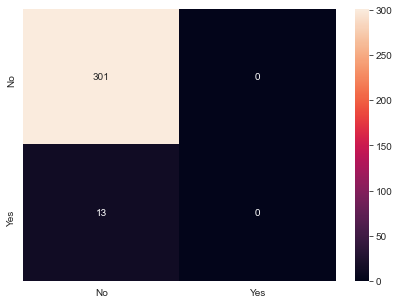

In [131]:
y_predict = Xg.predict(X_val_pca)
print(accuracy_score(y_val,y_predict))
cm=confusion_matrix(y_val, y_predict,labels=[-1, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [138]:
output=Xg.predict(X_test_pca)

In [141]:
output.shape #18 rows in future prediction table

(18,)

In [142]:
print(output)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


# Conclusions:
    
1.We have performed hyperparameter tuning and cross validation to find out Xg boost and random forest performs well.
2.We choose Xg boost as it is best estimator based on randomised search cv.
3.We also used PCA as dimentionality reduction method and with PCA all classifiers performed well with average of 95% accuracy

Improvisation:
    We can collect more data on sensor so it  would not be biased to one class.